# Universe Machine

# Notes


TODO:
* Once things are restructured get this ready for PR
* https://docs.google.com/document/d/1kRZUw_nHksmnfgu_u6OtERTrl_w-xgio5t7WndmFQPA/edit
* https://redwoodforest.slack.com/archives/D6UA26L6R/p1515102490000636
* Decide how to drop data in the heatmaps
* Sanity check that halo scatter matches stellar scatter (based off the slope): https://redwoodforest.slack.com/archives/C8G02V8F9/p1516236118000202

New TODO:

# Preamble, Imports, Plotting config

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
np.set_printoptions(linewidth=1000)

In [42]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.io.fits
import time
import pandas as pd
import scipy

# My libs
import data
import plots as p
import smhm_fit
import fits
import halo_info


# when we mess up imports
from importlib import reload

In [3]:
mpl.rcParams.update({'figure.dpi': 200})
def fig_font_size(size = 12):
    mpl.rcParams.update({'font.size': size})
fig_font_size()

# Data

In [4]:
# Note that we have already cut (as of 1 Feb) to centrals with mp > 12
# https://github.com/dr-guangtou/hsc_um2/blob/master/scripts/reduce_um_data_size.py
centrals, satellites = data.load()
print(np.log10(np.min(centrals["mp"])))
print(len(centrals))

11.50023647482564
1076948


### Vis raw data

[None, Text(0,0.5,'Count'), Text(0.5,0,'HM / Peak HM')]

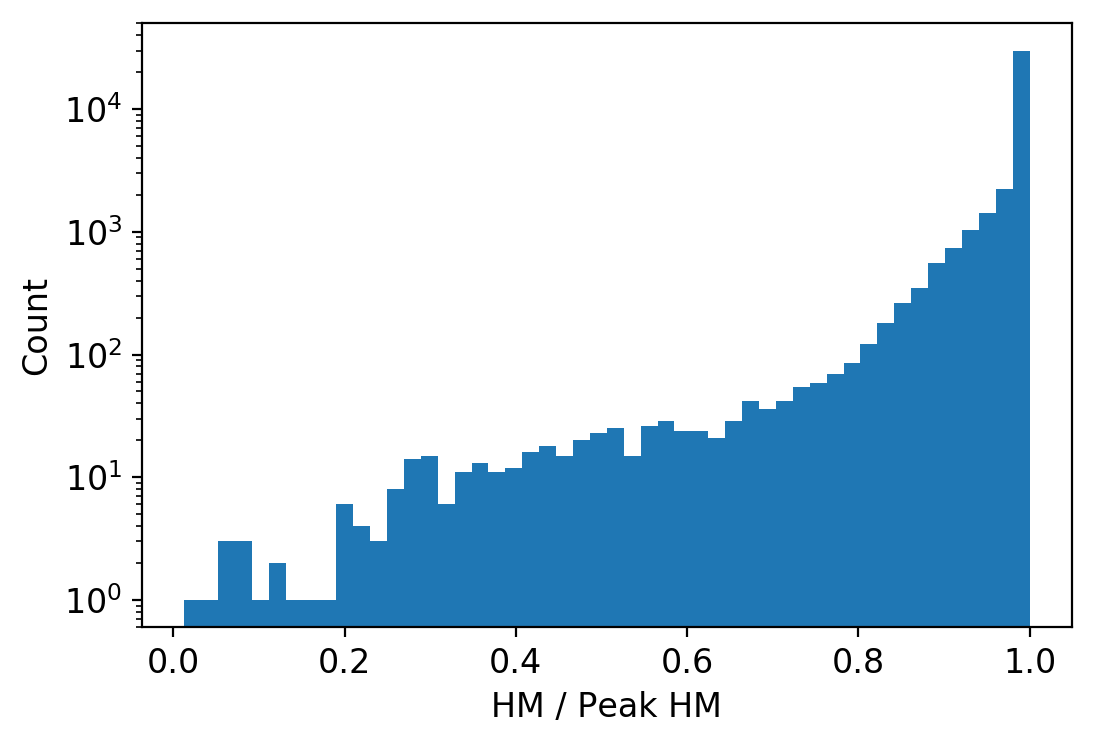

In [301]:
d = data_stellar_cut["cen"]["data"]
hm_phm_ratio = d["m"] / d["mp"]

fig, ax = plt.subplots()
ax.hist(hm_phm_ratio, bins=50)
ax.set(
    yscale="log",
    ylabel="Count",
    xlabel="HM / Peak HM",
)

In [302]:
d.dtype

dtype([('id', '<i8'), ('upid', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8'), ('m', '<f8'), ('mp', '<f8'), ('sm', '<f8'), ('icl', '<f8'), ('sfr', '<f8'), ('mvir', '<f8'), ('rvir', '<f8'), ('rs', '<f8'), ('Halfmass_Scale', '<f8'), ('scale_of_last_MM', '<f8'), ('M200b', '<f8'), ('M200c', '<f8'), ('Acc_Rate_Inst', '<f8'), ('Acc_Rate_100Myr', '<f8'), ('Acc_Rate_1*Tdyn', '<f8'), ('Acc_Rate_2*Tdyn', '<f8'), ('Acc_Rate_Mpeak', '<f8'), ('Vmax@Mpeak', '<f8')])

In [303]:
d  = data_stellar_cut["cen"]["data"], data_stellar_cut["halo"]["data"]
dh = data_stellar_cut["halo"]["data"]["id" == d["id"]]
sm_hm_ratio = (d["sm"] + d["icl"]) / d["m"]
cen_sm_perc = (d["sm"] + d["icl"]) / (dh["sm"] + dh["icl"])

plt.histogram(sm_hm_ratio, cen_sm_perc, bins=50)

TypeError: tuple indices must be integers or slices, not str

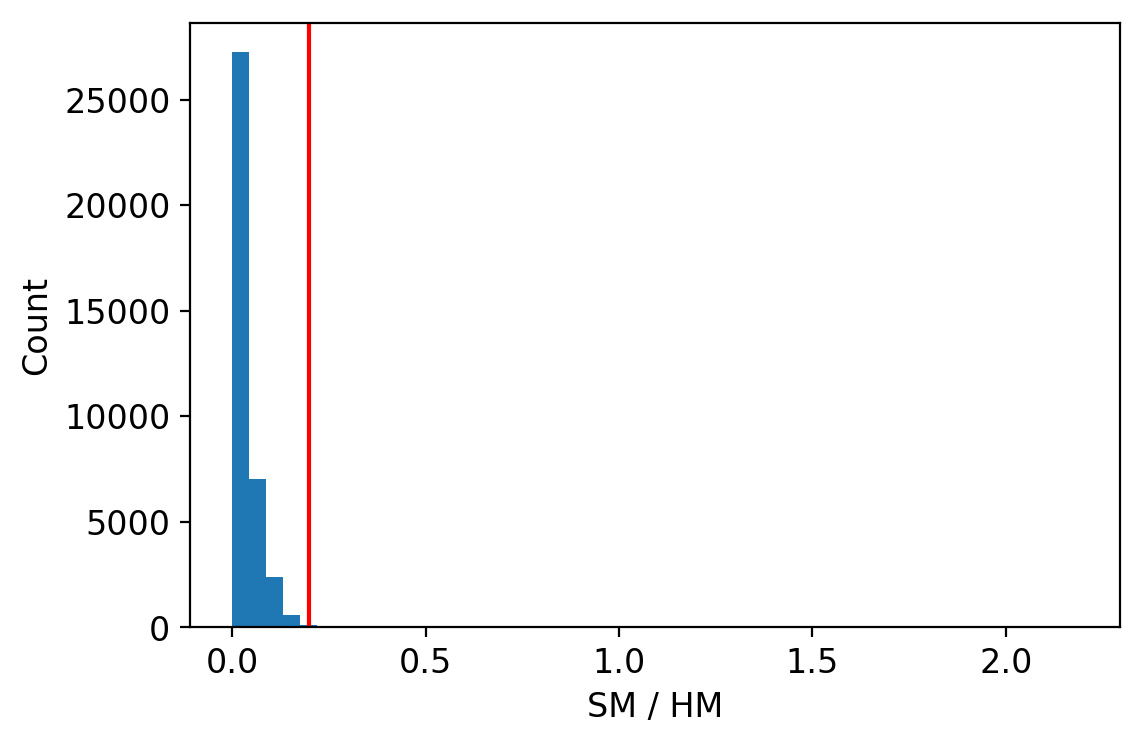

In [304]:
d = data_stellar_cut["cen"]["data"]
sm_hm_ratio = (d["sm"] + d["icl"]) / d["m"]
fig, ax = plt.subplots()
ax.hist(sm_hm_ratio, bins=50)
ax.set(
    ylabel="Count",
    xlabel="SM / HM",
)
ax.axvline(0.2, color="r")

/home/christopher/.virtualenvs/hsc_um2/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """


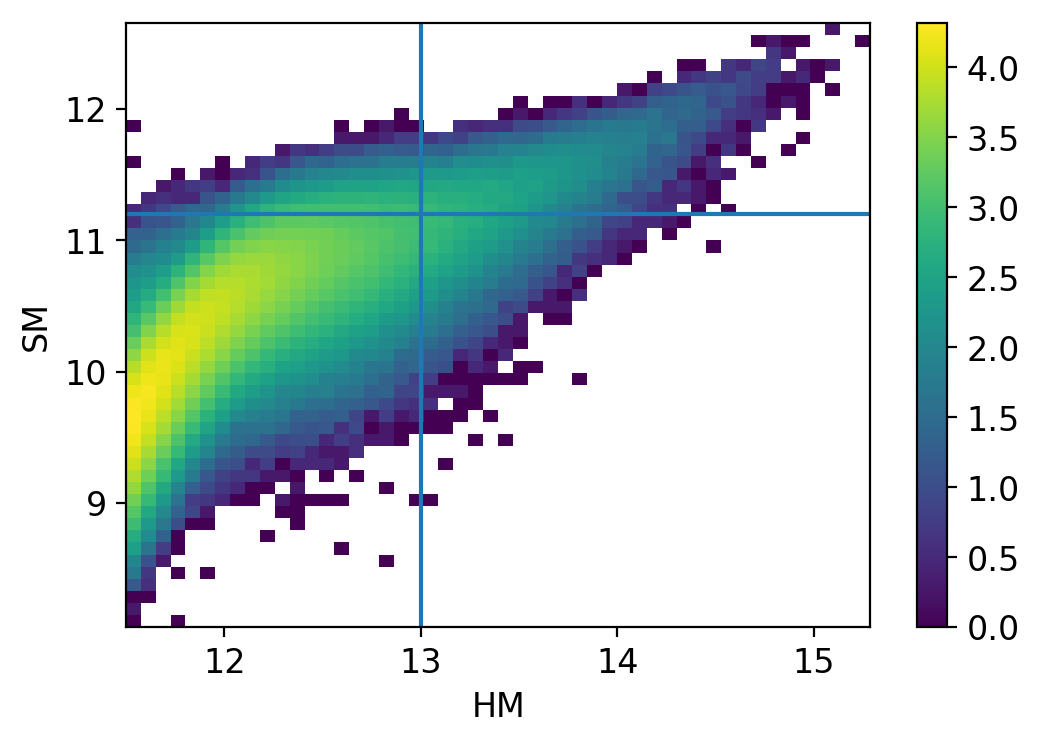

In [305]:
hm = np.log10(centrals["m"])
sm = np.log10(centrals["sm"] + centrals["icl"])
hist, x_edge, y_edge = np.histogram2d(hm, sm, bins=50)

hist = np.log10(hist)
hist = hist.T

fig, ax = plt.subplots()
img = ax.imshow(hist, origin="lower", extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]], aspect="auto")
fig.colorbar(img)
ax.set(
    xlabel="HM",
    ylabel="SM",
)
ax.axhline(11.2)
ax.axvline(13)
#ax.axhline(12, c="r")
#ax.axvline(14.5, c="r")

## Process data

### Data with N sats

In [5]:
data_stellar_cut, data_halo_cut = data.cuts_with_sats(centrals, satellites)

[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]
[5.3703179637025325e+19,

/home/christopher/research/hsc_um2/cb/smhm_fit.py:83: RuntimeWarning: overflow encountered in power
  ((gamma * np.power(usm, delta - gamma - 1)) / (sm0 * np.power(denom, 2))))
/home/christopher/research/hsc_um2/cb/smhm_fit.py:83: RuntimeWarning: overflow encountered in multiply
  ((gamma * np.power(usm, delta - gamma - 1)) / (sm0 * np.power(denom, 2))))


[5.3703179637025325e+19, 1.0964781961431828e+18, 10, 10, 20]


/home/christopher/research/hsc_um2/cb/smhm_fit.py:83: RuntimeWarning: overflow encountered in power
  ((gamma * np.power(usm, delta - gamma - 1)) / (sm0 * np.power(denom, 2))))
/home/christopher/research/hsc_um2/cb/smhm_fit.py:83: RuntimeWarning: overflow encountered in multiply
  ((gamma * np.power(usm, delta - gamma - 1)) / (sm0 * np.power(denom, 2))))


In [6]:
for key in data_stellar_cut.keys():
    mass, csmf = fits.build_csmf(data_stellar_cut, key)
    data_stellar_cut[key]["smf"] = (mass, csmf) # note that these masses are log!

for key in data_halo_cut.keys():
    mass, csmf = fits.build_csmf(data_halo_cut, key)
    data_halo_cut[key]["smf"] = (mass, csmf) # note that these masses are log!
data_stellar_cut
data_stellar_cut["cen"]["hmf"] = fits.build_chmf(data_stellar_cut, "cen")

### Richness data

In [14]:
richness = {
    "richness": data.create_richness_data(centrals, satellites),
}

In [15]:
richness["rmf"] = fits.build_rmf(richness["richness"])
richness["photoz_rmf"] = fits.build_rmf(richness["richness"])

### Sanity checks/exploration

271995
368063
325303


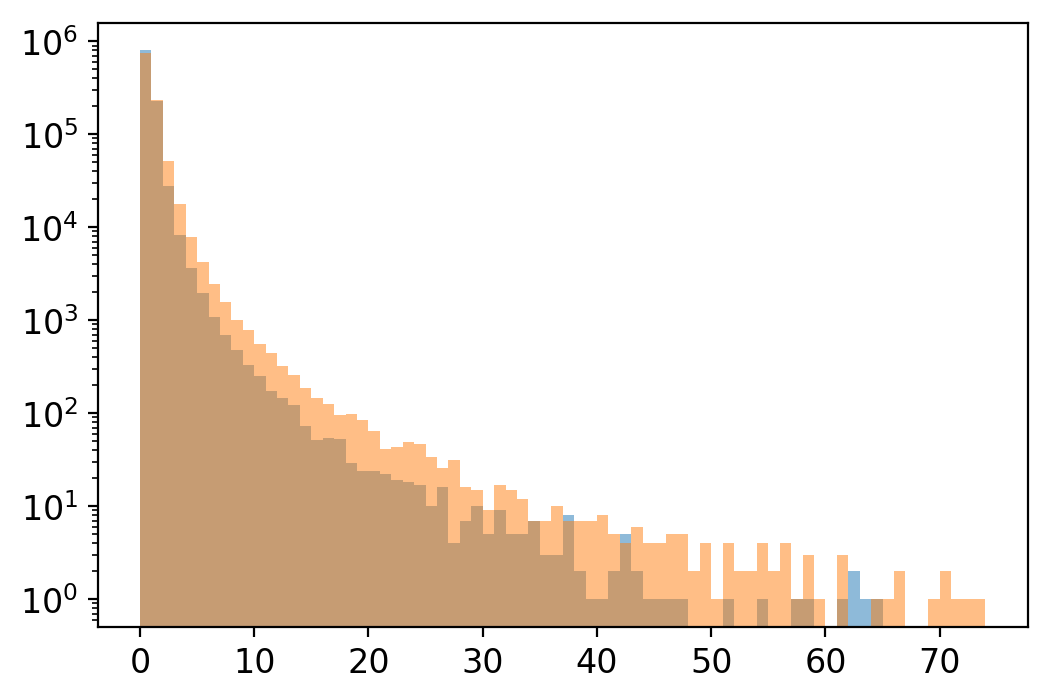

In [16]:
r = richness["richness"]["richness"]
r1 = richness["richness"]["photoz_richness"]

x = plt.hist(r, bins=np.arange(75), alpha=0.5)
x = plt.hist(r1, bins=np.arange(75), alpha=0.5)

plt.yscale('log', nonposy='clip')

print(np.count_nonzero(r >= 1))
print(np.sum(r))
print(np.count_nonzero(r1 >= 1))

In [19]:
# https://arxiv.org/pdf/1410.1193.pdf says that 6.2% of richness comes from non cluster galaxies
# With an error of 52 we get 24%
print(np.sum(r))
print(np.sum(r1))
print(np.average(r1[r >= 20]/r[r >= 20]))

368063
532335
1.3655298377918061


In [164]:
print(data_stellar_cut.keys())
for key in data_stellar_cut.keys():
    print(key)
    print(key, len(data_stellar_cut[key]["data"]), len(data_halo_cut[key]["data"]))

dict_keys(['cen', 1, 2, 5, 'halo', 'insitu'])
cen
cen 37477 36491
1
1 39061 36491
2
2 30094 36491
5
5 33983 36491
halo
halo 34869 36491
insitu
insitu 33309 36490


In [165]:
print(data_halo_cut.keys())
print(data_halo_cut["cen"].keys())
print(data_stellar_cut["cen"].keys())
print(len(data_stellar_cut["cen"]["data_cut"]))

dict_keys(['cen', 1, 2, 5, 'halo', 'insitu'])
dict_keys(['data', 'fit', 'data_cut', 'fit_cut', 'mag_gap', 'smf'])
dict_keys(['data', 'fit', 'data_cut', 'fit_cut', 'mag_gap', 'smf', 'hmf'])
37477


### Sanity check these fits

They all kinda look like power laws? A little too much like power laws.

Also some analysis of these fits in the paper

If we are going for a power law, we have
```
log(HM) = log(M1) + B log(SM / sm0)
HM = M1 * (SM/sm0)^B = M1 * SM^B / (sm0)^B = M1/sm0^B * SM^B
log(HM) = log(M1/sm0*B) + B*log(SM)
log(HM) = log(M1)-log(sm0) - log(B) + B*SM
```

In [166]:
print("m1, sm0, beta, delta, gamma")
for key in data_halo_cut.keys():
    f = data_halo_cut[key]["fit"]
    print("{}, {:2f}, {:2f}, {:2f}, {:2f}, {:2f}".format(key, np.log10(f[0]), np.log10(f[1]), f[2], f[3], f[4]))

m1, sm0, beta, delta, gamma
cen, 12.935346, 10.954858, 0.382429, 0.224716, 1.649295
1, 12.883565, 11.130136, 0.779331, 0.156323, 1.026725
2, 14.112270, 11.979857, 1.120076, 0.000000, 0.828510
5, 13.284356, 11.514671, 0.524564, 0.210898, 0.923283
halo, 12.743339, 11.040177, 1.115193, 0.000000, 0.000000
insitu, 14.623166, 10.991189, 5.267735, 0.044830, 1.424472


In [ ]:
def get_power_law_coeffs(m1, sm0, beta, delta, gamma):
    if np.abs(gamma) > 1e-9 or np.abs(delta) > 1e-9:
        print("not a power law!")
        return
    # y = az^(b)
    a = np.log10(m1) - np.log10(sm0) - np.log10(beta)
    b = beta
    print("HM = {} * SM ^ {}".format(a, b))
    print("SM = {} * HM ^ {}".format(1/(a**(1/b)), 1/b))
for key in data_halo_cut.keys():
    print(key)
    get_power_law_coeffs(*data_halo_cut[key]["fit"])
for key in data_stellar_cut.keys():
    print(key)
    get_power_law_coeffs(*data_stellar_cut[key]["fit"])

In [ ]:
for key in data_halo_cut.keys():
    print(data_halo_cut[key]["fit"])

#### Plots

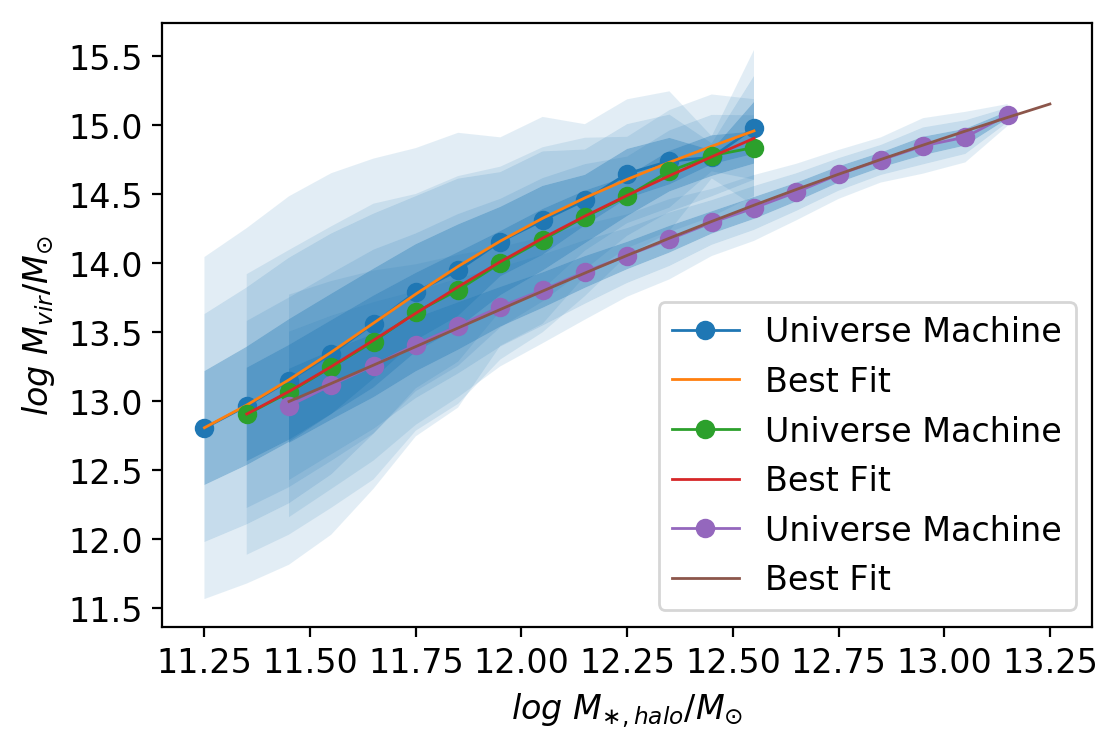

In [59]:
_, ax = plt.subplots()
for key in ["cen", 1, "halo"]: #data_stellar_cut.keys():
    p.sm_hm.hm_at_fixed_sm(data_stellar_cut[key]["data"], key, fit=data_stellar_cut[key]["fit"], ax =ax)

In [ ]:
for key in ["cen"]:#data_halo_cut.keys():
    p.sm_hm.sm_at_fixed_hm(data_halo_cut[key]["data"], key, fit=data_halo_cut[key]["fit"])

# Intro Plot

Intro everything by showing the SM-HM plot + some of the scatter plots (including lit values)

[14726, 9279, 5597, 3294, 1822, 974, 469, 203, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]


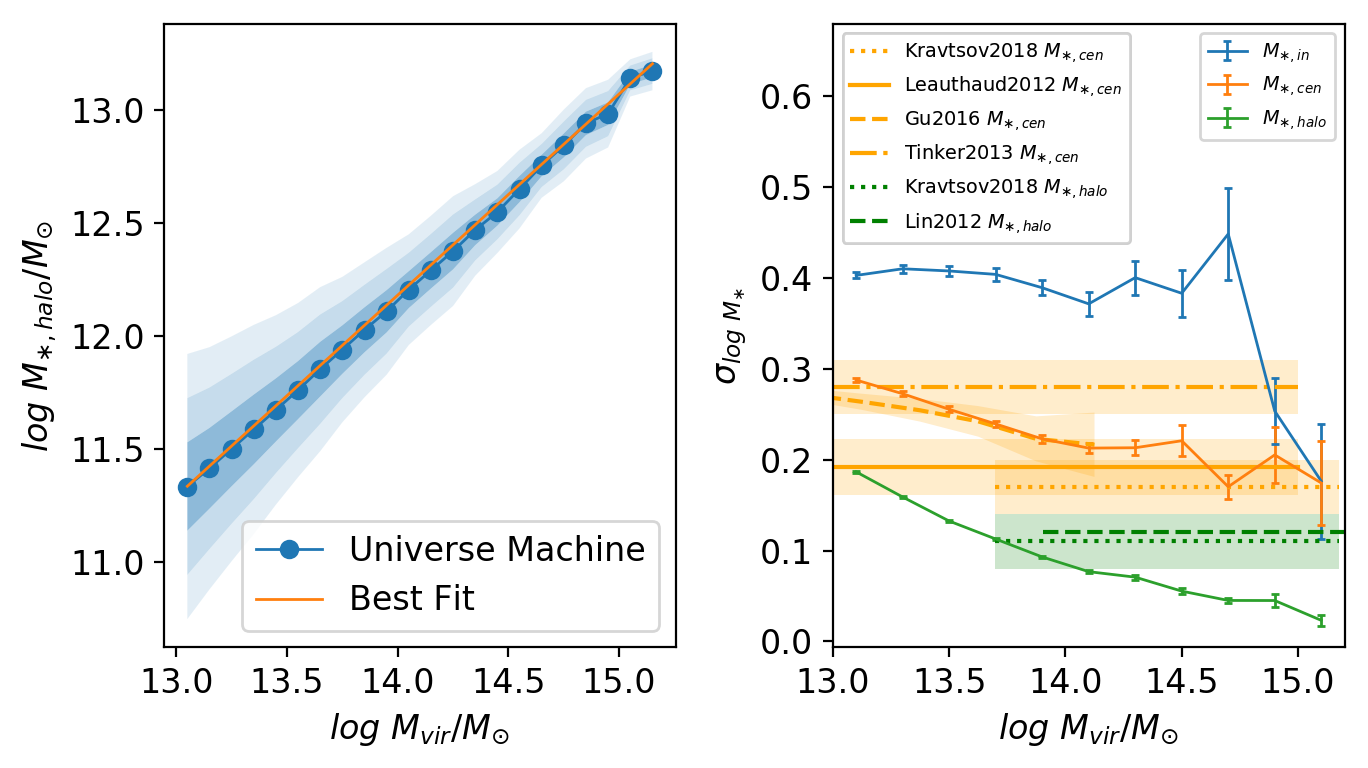

In [68]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(7, 4)
p.sm_hm.sm_at_fixed_hm(data_halo_cut["halo"]["data"], "halo", fit=data_halo_cut["halo"]["fit"], ax=axes[0])
p.scatter.in_sm_at_fixed_hm_incl_lit(data_halo_cut, ax=axes[1])
plt.tight_layout()

# Scatter for various definitions of stellar mass

[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[14726, 9279, 5597, 3294, 1822, 974, 469, 204, 92, 27, 6]
[12.48253297 12.36329538 12.28477307 12.17716842 12.0550226  11.91833561 11.77583216 11.6333287  11.48500878 11.32796415]
[11, 27, 62, 149, 353, 839, 1996, 4847, 11381]
[12.55864091 12.46654536 12.38840367 12.29072657 12.16514172 12.03955688 11.91397203 11.76885177 11.61535918 11.44791271]
[10, 27, 62, 150, 359, 833, 2048, 4806, 11415]
[12.59418527 12.5127637  12.44762645 12.35263463 12.23050229 12.10836994 11.98080949 11.83696473 11.67954971 11.49499417]
[12, 27, 60, 147, 350, 862, 2023, 4768, 11597]
[12.692745   12.6125063  12.54712663 12.44311351 12.33612858 12.21131284 12.08352529 11.93196332 11.75365511 11.54265706]
[10, 27, 62, 150, 354, 831, 2053, 4811, 11479]
[13.06926974 12.97500532 12.872885

(0.0, 0.4573052762359161)

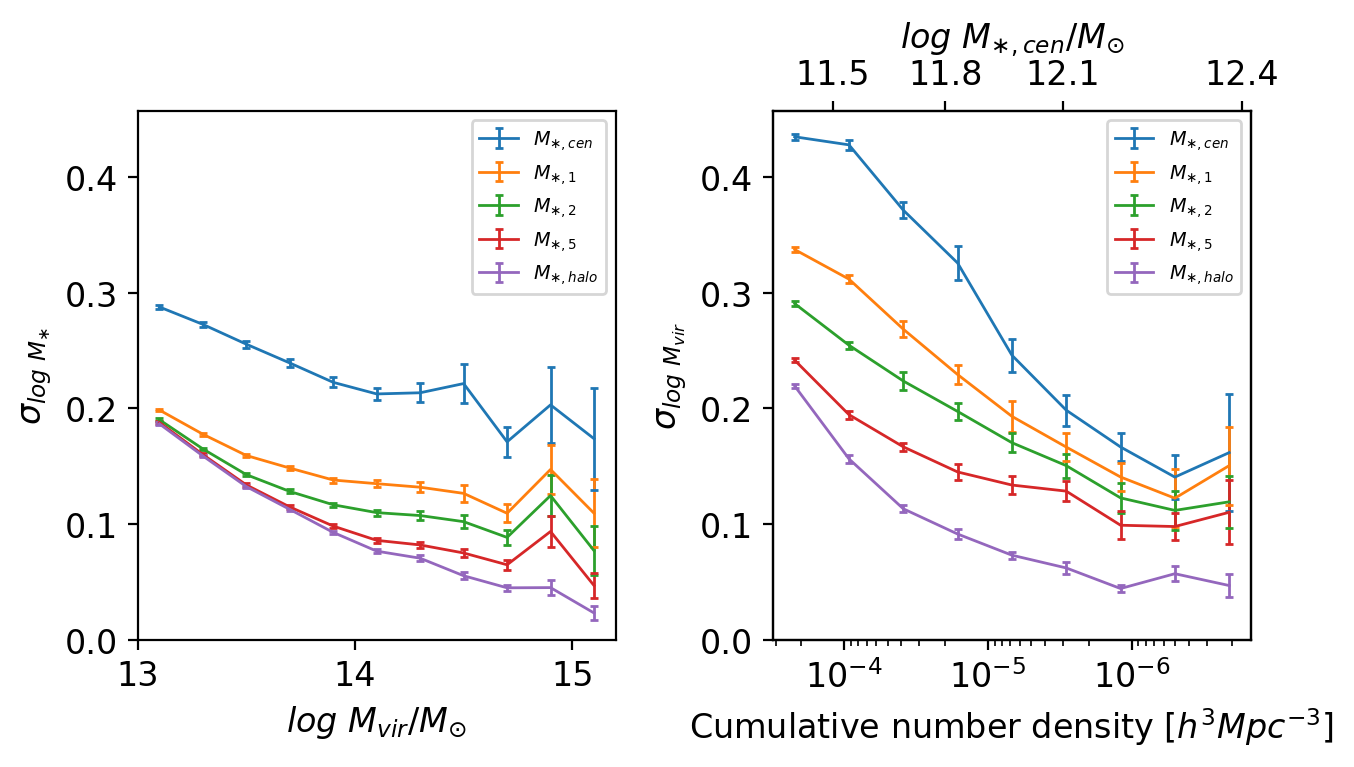

In [16]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(7, 4)
p.scatter.in_sm_at_fixed_hm(data_halo_cut, ax=axes[0])
p.scatter.in_hm_at_fixed_number_density(data_stellar_cut, ax=axes[1])
plt.tight_layout()
axes[0].set_ylim(axes[1].get_ylim())

# Stellar mass function for various SMs and vs HSC etc


In [26]:
assert fits.density_at_mass(data_stellar_cut, "cen", fits.mass_at_density(data_stellar_cut, "cen", 1e2)) == 1e2

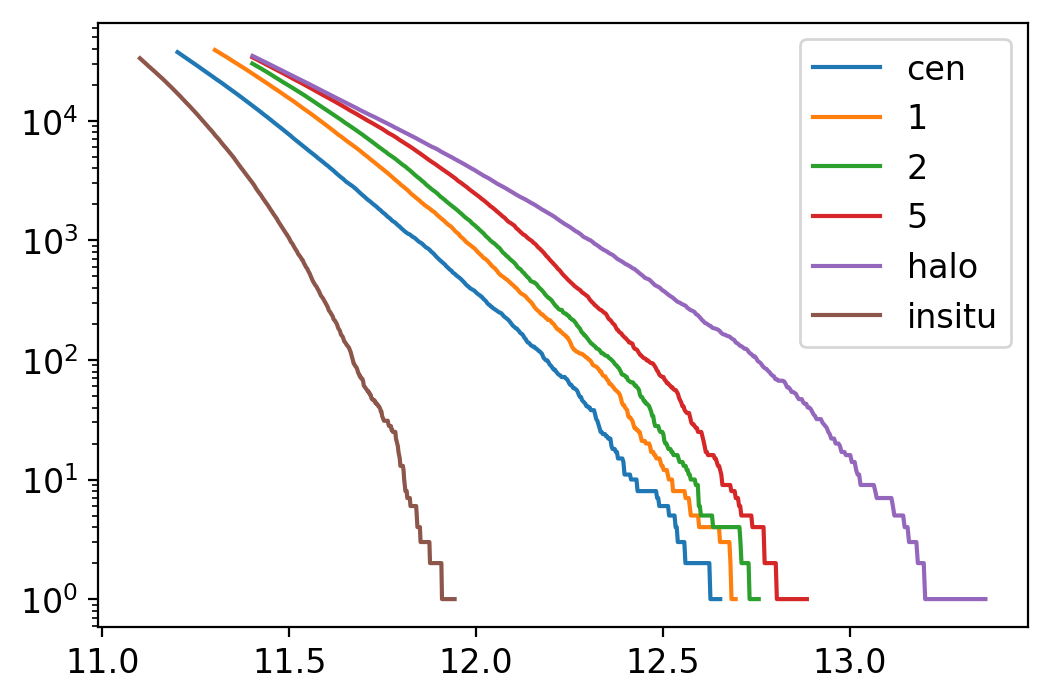

In [27]:
_, ax = plt.subplots()
for key in data_stellar_cut.keys():
    smf_data = data_stellar_cut[key]["smf"]
    ax.plot(smf_data[0], smf_data[1], label=key)
ax.set_yscale("log")
ax.legend()

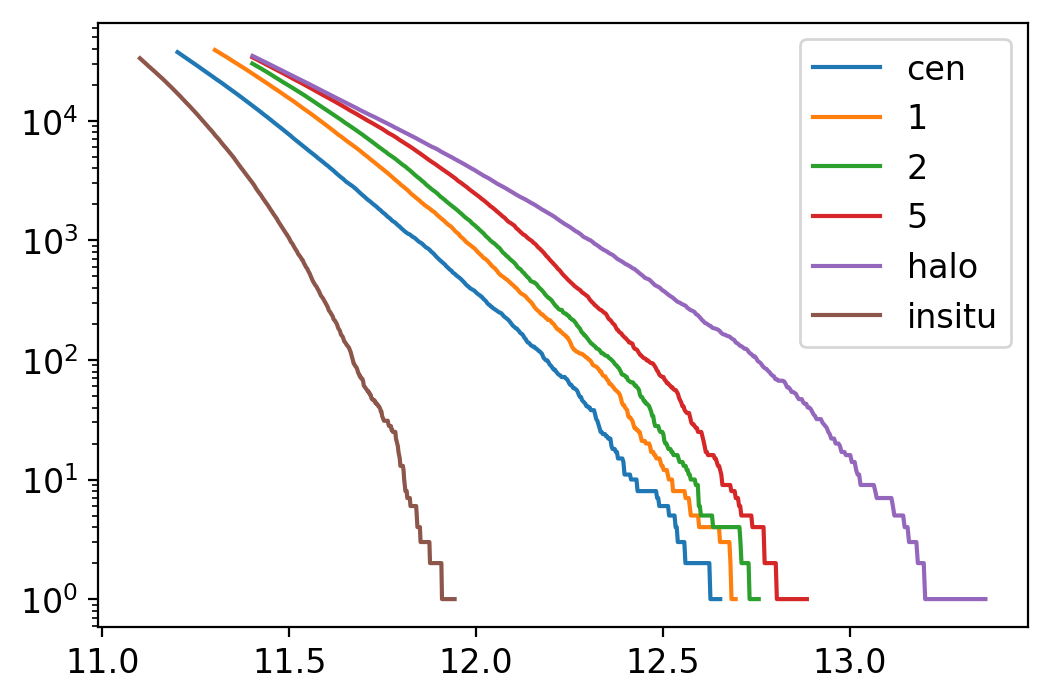

In [28]:
_, ax = plt.subplots()
for key in data_stellar_cut.keys():
    smf_data = data_stellar_cut[key]["smf"]
    ax.plot(smf_data[0], smf_data[1], label=key)
ax.set_yscale("log")
ax.legend()

### Comparison with HSC etc

In [ ]:
hsc_smf_file_m10 = "/home/christopher/research/hsc_um2/data/s16a_massive_fastlane_logm10_smf_default.fits"
hsc_smf_file_m100 = "/home/christopher/research/hsc_um2/data/s16a_massive_fastlane_logm100_smf_default.fits"

m10_smf = astropy.io.fits.open(hsc_smf_file_m10)[1].data
m100_smf = astropy.io.fits.open(hsc_smf_file_m100)[1].data

In [ ]:
print(m10_smf.dtype)
print(m10_smf)

In [ ]:
def plot_sim_smf(stellar_masses, ax, label):

    nonzero_stellar_masses = np.log10(stellar_masses[stellar_masses != 0])
    print("Dropped {} galaxies with mass of 0".format(len(stellar_masses) - len(nonzero_stellar_masses)))

    sim_volume = 400**3 # https://redwoodforest.slack.com/archives/C5W6EQCAU/p1513187949000425 SMDPL
    num_bins = 30
    x, y, err = smf.compute_smf(
        nonzero_stellar_masses, sim_volume, num_bins, 
        np.min(nonzero_stellar_masses), np.max(nonzero_stellar_masses),
    )
    ax.errorbar(x, y, yerr = err, label=label)


fig, ax = plt.subplots()
ax.errorbar(m10_smf["logm_mean"], m10_smf["smf"], yerr = m10_smf["smf_err"], label="HSC m10")
ax.errorbar(m100_smf["logm_mean"], m100_smf["smf"], yerr = m100_smf["smf_err"], label="HSC m100")
plot_sim_smf(centrals["sm"], ax, "universe machine insitu centrals")
plot_sim_smf(centrals["sm"] + centrals["icl"], ax, "all mass cents")
plot_sim_smf(np.append(centrals["sm"] + centrals["icl"], satellites["sm"] + satellites["icl"]), ax, "all mass cents and sats")
ax.legend()
ax.set(
    yscale="log",
    xlim=[11, 12.4],
)
fig.set_size_inches(18.5, 10.5)

# Richness as an estimator

What about richness? Does that have a relation with scatter at fixed halo mass

## Sanity check RMF

In [ ]:
fits.density_at_richness(data_stellar_cut, "cen", fits.richness_at_density(data_stellar_cut, "cen", 2e-4))

In [ ]:
#p.scatter.in_richness_at_fixed_hm(data_halo_cut)
#p.scatter.in_hm_at_fixed_richness_number_density(data_stellar_cut)

_, ax = plt.subplots()
rmf_data = data_stellar_cut["cen"]["rmf"]
ax.plot(rmf_data[0], rmf_data[1], label="stellar cut")
rmf_data = data_halo_cut["cen"]["rmf"]
ax.plot(rmf_data[0], rmf_data[1], label="halo cut")
ax.set_yscale("log")
ax.legend()

(array([ 20.,  62., 177., 429., 740., 832., 546., 192.,  40.,   3.]),
 array([12.65513843, 12.82809577, 13.0010531 , 13.17401043, 13.34696776, 13.51992509, 13.69288242, 13.86583975, 14.03879708, 14.21175441, 14.38471174]),
 <a list of 10 Patch objects>)

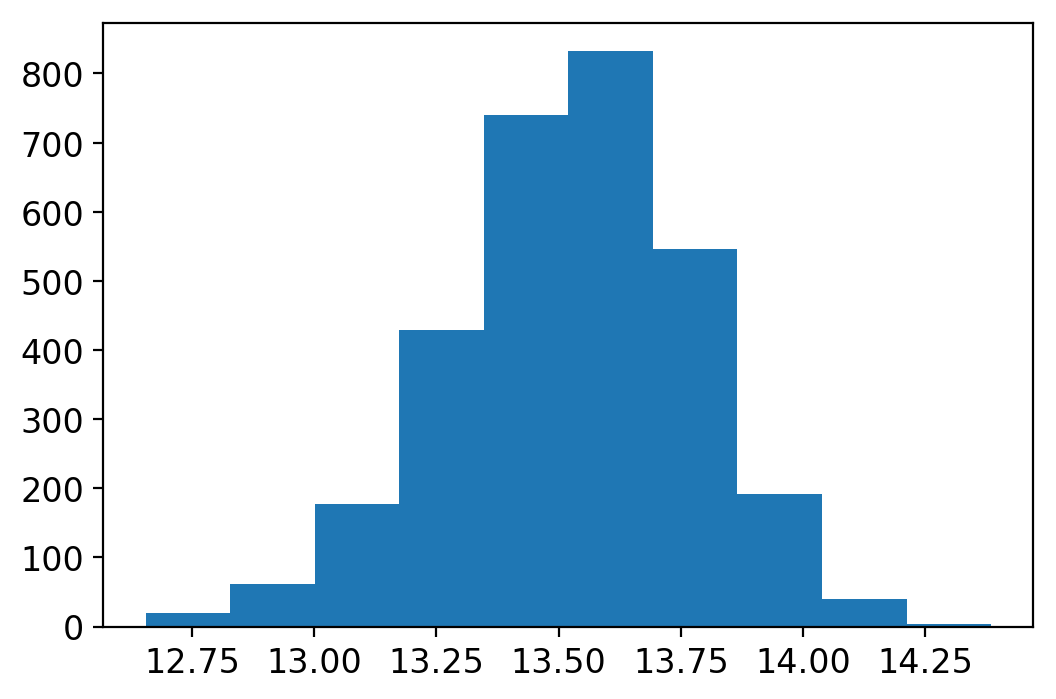

In [38]:
r = data_stellar_cut["cen"]["richness"]

ex = r[r["richness"] == 2]
#plt.hist(r, bins=int(np.max(r["richness"])))
#plt.yscale("log")
plt.hist(np.log10(ex["m"]))

## Richness plots


[12142, 4018, 1797, 1316, 588, 400, 198, 138, 122, 54]
[5616, 1787, 815, 567, 246, 160, 83, 47, 64, 15]
[12142, 4018, 1797, 1316, 588, 400, 198, 138, 122, 54]
[11, 27, 62, 149, 353, 839, 1996, 4847, 11381]
[12, 27, 60, 147, 350, 862, 2023, 4768, 11597]
[10, 27, 63, 149, 359, 852, 2026, 4816, 11558]


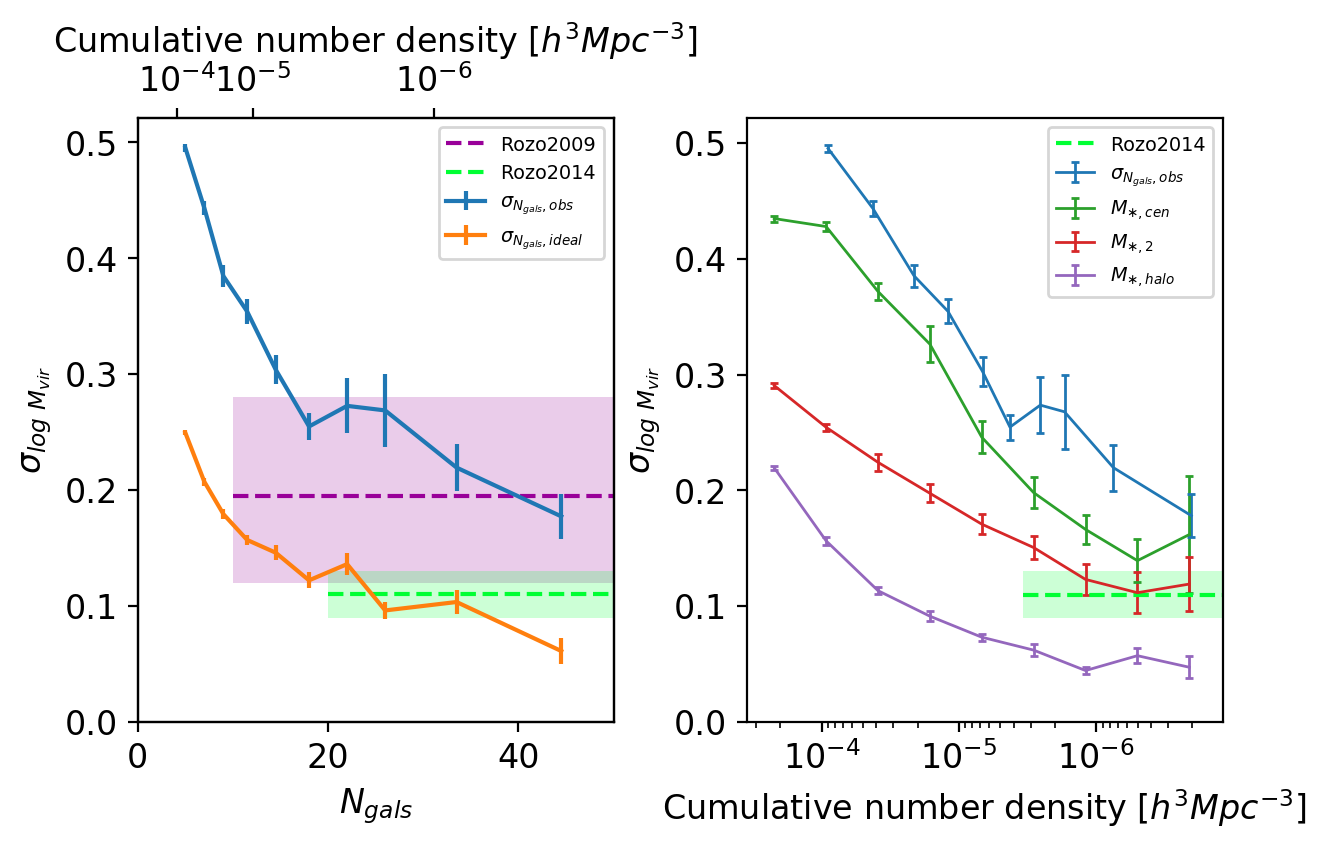

In [36]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(7, 4)
fig.subplots_adjust(wspace=0.28)
p.scatter.in_hm_at_fixed_richness_number_density(richness, axes[0])
p.scatter.in_hm_at_fixed_number_density_incl_richness(data_stellar_cut, richness, axes[1])


### Old color plots

In [ ]:
# Only count sats of a large enough size towards richness
minMassForRichness = 10**10.8
richness = cluster_sum.get_richness(centrals_halo_cut, satellites, minMassForRichness)
print("Out of {} clusters, {} have a richness > 0".format(len(richness), np.count_nonzero(richness)))
heatmaps.richness_and_hm_vs_sm_scatter(
    data_halo_cut[0]["data"],
    satellites,
    minMassForRichness,
    data_halo_cut[0]["fit"],
    0,
)

In [ ]:
heatmaps.richness_and_sm_vs_hm_scatter(
    data_stellar_cut[0]["data"],
    satellites,
    minMassForRichness,
    data_stellar_cut[0]["fit"],
    0,
)

# Is cen\* | halo\* scatter correlated with halo\* | vir scatter?

We are asking here whether we can show: s stands to sigma - scatter

s(cen | vir) = s(cen | halo) + s(halo | vir)

1) Are these two scatter correlated (does saying something about the bias in s(cen | halo) say anything about the scatter in s(halo | vir)

In [128]:
cens_bias = halo_info.get_sm_bias(data_halo_cut["cen"], include_id=True)
cens_bias = pd.DataFrame(cens_bias).set_index("id")
cens_bias = cens_bias.rename(columns={"sm_bias": "cen_sm_bias"})

halo_bias = halo_info.get_sm_bias(data_halo_cut["halo"], include_id=True)
halo_bias = pd.DataFrame(halo_bias).set_index("id")
halo_bias = halo_bias.rename(columns={"sm_bias": "halo_sm_bias"})

In [129]:
# Exp
z = data.unify(data_halo_cut, "cen", "halo")
cols = [i + j for j in ["_cen", "_halo"] for i in ["sm", "icl"]] + ["m_cen"]
z = z[cols]
z = z.rename(columns={"m_cen":"m"})

# Add biases
z = z.join(halo_bias, how="inner")
z = z.join(cens_bias, how="inner")

In [132]:
res = halo_info.build_sm_sm_bias_fit(z)

[5.19852376e+11 2.23073740e+11 9.13423074e-01 9.22352592e-03 1.13704117e+00]


In [142]:
cen_halo_bias = halo_info.get_sm_sm_bias(z, res["fit"])
z = z.assign(cen_halo_sm_bias=cen_halo_bias)

In [160]:
print(len(z))
for bias in ["cen_halo_sm_bias", "halo_sm_bias", "cen_sm_bias"]:
    print(np.mean(z[bias]))
z.head()

1076948
0.00013518044545439203
-0.062496541533895285
0.0007683297849828373


,sm_cen,icl_cen,sm_halo,icl_halo,m,halo_sm_bias,cen_sm_bias,cen_halo_sm_bias
8272346909,5.327000e+09,1.717000e+08,5.824200e+09,1.787160e+08,3.406000e+11,-0.207289,0.105879,-0.018198
8272346933,2.910000e+10,1.008000e+09,2.910000e+10,1.008000e+09,3.823000e+11,0.448433,0.742831,0.030272
8272346989,2.205000e+10,6.076000e+08,2.205000e+10,6.076000e+08,4.391000e+11,0.271477,0.498158,0.019600
8272347167,1.871000e+10,7.123000e+08,1.935960e+10,7.498400e+08,4.749000e+11,0.189399,0.363125,0.001390
8272347463,4.383000e+10,2.421000e+10,4.383000e+10,2.421000e+10,1.226000e+12,0.352550,0.272503,0.088189


In [158]:
cutz = z[z["m"] > 1e13]
print(len(cutz))
for bias in ["cen_halo_sm_bias", "halo_sm_bias", "cen_sm_bias"]:
    print(np.mean(cutz[bias]))
cutz.head()

36491
-0.05858548426481642
-0.010405204681133443
0.004073568622020519


,sm_cen,icl_cen,sm_halo,icl_halo,m,halo_sm_bias,cen_sm_bias,cen_halo_sm_bias
8272347969,6.128000e+10,3.866000e+11,2.022671e+12,7.056346e+11,1.509000e+14,0.097265,-0.116217,-0.173780
8272349784,9.685000e+10,1.505000e+10,3.090956e+11,1.587396e+10,1.009000e+13,0.217738,0.031144,-0.169703
8272349832,1.342000e+11,1.567000e+11,7.290459e+11,5.156953e+11,1.136000e+14,-0.133913,-0.211729,-0.127677
8272350792,4.037000e+10,1.974000e+11,2.459945e+11,2.636187e+11,4.036000e+13,-0.122161,0.031037,0.033182
8272351316,8.883000e+10,3.275000e+11,1.683695e+11,3.286539e+11,2.531000e+13,0.047161,0.402805,0.283346


In [161]:
print(np.corrcoef(z["cen_halo_sm_bias"], z["halo_sm_bias"]))
print(np.corrcoef(cutz["cen_halo_sm_bias"], cutz["halo_sm_bias"]))

[[1.         0.22189064]
 [0.22189064 1.        ]]
[[1.         0.08592721]
 [0.08592721 1.        ]]


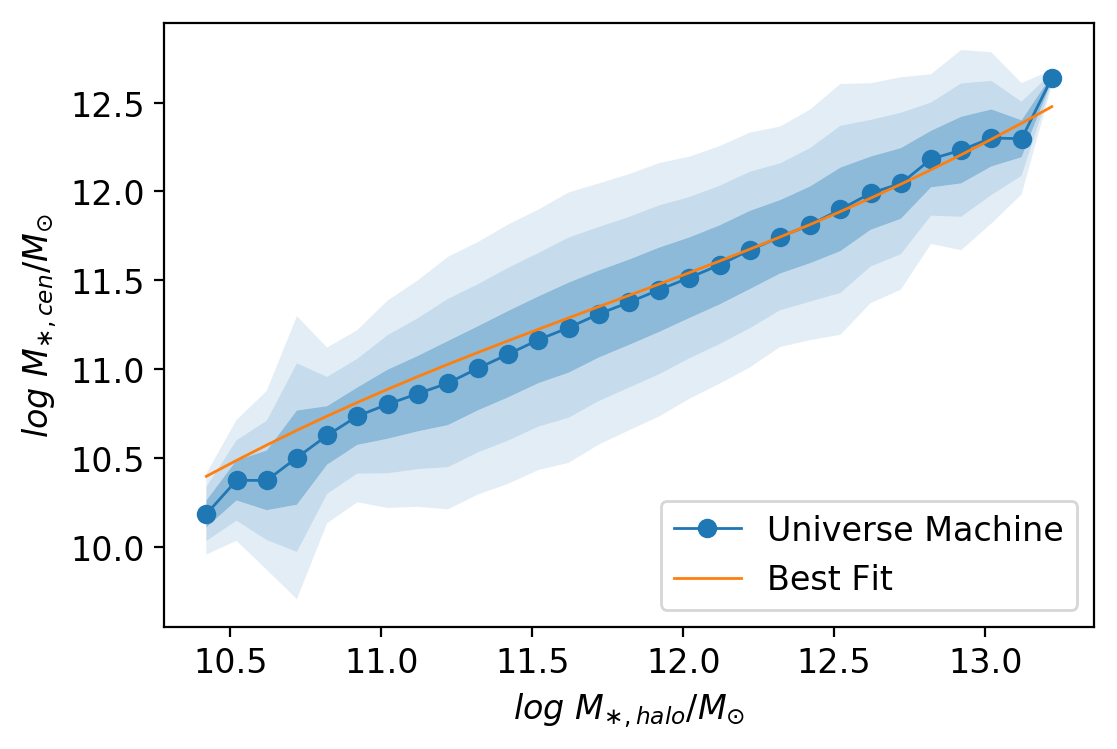

In [153]:
p.sm_hm.sm_cen_at_fixed_sm_halo(cutz, res["fit"])

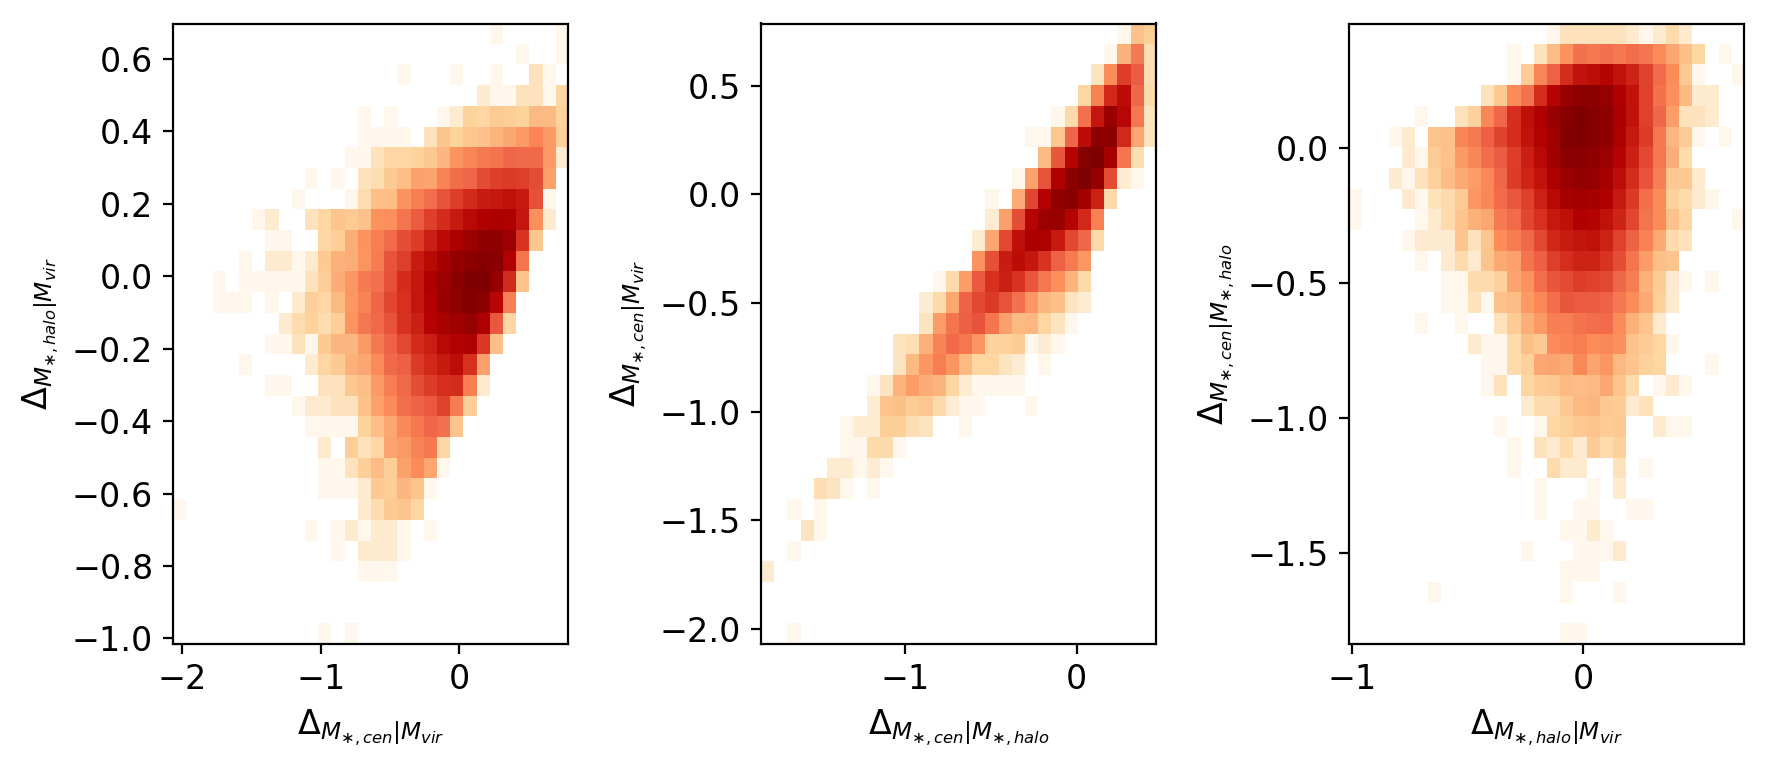

In [177]:
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(9, 4)

#fig, ax = plt.subplots()
ax = axes[0]
_, _, _, img = ax.hist2d(cutz["cen_sm_bias"], cutz["halo_sm_bias"], cmap="OrRd", norm=mpl.colors.LogNorm(), bins=30)
ax.set(xlabel=r"$\Delta_{M_{\ast, cen} | M_{vir}}$", ylabel=r"$\Delta_{M_{\ast, halo} | M_{vir}}$")
#fig.colorbar(img, label="count")

#fig, ax = plt.subplots()
ax = axes[1]
_, _, _, img = ax.hist2d(cutz["cen_halo_sm_bias"], cutz["cen_sm_bias"], cmap="OrRd", norm=mpl.colors.LogNorm(), bins=30)
ax.set(xlabel=r"$\Delta_{M_{\ast, cen} | M_{\ast, halo}}$", ylabel=r"$\Delta_{M_{\ast, cen} | M_{vir}}$")
#plt.colorbar(img, label="count")

#fig, ax = plt.subplots()
ax = axes[2]
_, _, _, img = ax.hist2d(cutz["halo_sm_bias"], cutz["cen_halo_sm_bias"], cmap="OrRd", norm=mpl.colors.LogNorm(), bins=30)
ax.set(xlabel=r"$\Delta_{M_{\ast, halo} | M_{vir}}$", ylabel=r"$\Delta_{M_{\ast, cen} | M_{\ast, halo}}$")
#plt.colorbar(img, label="count")
plt.tight_layout()

# Is halo* | vir scatter consistent with poisson scatter?

The scatter in halo\* | vir is the first component of our split scatter (the other being cen\* | halo\*). Could this scatter just be explained by Poisson noise?

To test this, we need to:
1. Look at the current scatter
2. Do some poisson resampling and see that scatter
3. Compare the two

Suggested way:
1. Make a thin cut in vir mass (can do this multiple times with different cuts to check that this isn't mass dependent)
2. Look at the scatter (s) in halo\* in that thin cut
3. Create a distribution (d) of all the satellite galaxies in the halos included in the cut
4. For each halo
    * Choose the number (n) of satellites it has by making a poisson draw with lambda = the number it has in reality
    * Choose n satellites from d
5. Having repopulated the halos with randomly selected sats, compute the scatter and compare it to (s)
6. If these two scatters are similar, claim that scatter in halo\* at fix vir is consistent with Poisson. This suggests that there is likely no (or a weak) physical explanation for the scatter.

Issues/Assumptions
1. I think we need to do this in a think mass cut as the satellite mass function definitely depends on the mass of the host halo.
    * We could probably work around this, but is simpler to just make the mass cut.
2. This assumes that satellites can be populated by IID selection. I'm not sure this is true. I think there is probably some conditional dependence.
    * e.g. if one of the satellites has its own satellites?
    * Could we check whether this is a big deal by just doing the resampling without doing the poisson draw? If the scatter is the same, this is OK?
3. This doesn't actually prove that there isn't underlying method to the apparent randomness. That method could just give the same scatter as randomness.
    * This was Peter's point.
    * Should we be checking more than just the distribution of scatters?

In [418]:
cuts = (10**13.45, 10**13.47)
cut_sample_halo = data_halo_cut["halo"]["data"][(data_halo_cut["halo"]["data"]["m"] > cuts[0]) & (data_halo_cut["halo"]["data"]["m"] < cuts[1])]
cut_sample_cen = data_halo_cut["cen"]["data"][(data_halo_cut["cen"]["data"]["m"] > cuts[0]) & (data_halo_cut["cen"]["data"]["m"] < cuts[1])]
assert np.all(cut_sample_cen["id"] == cut_sample_halo["id"])
ids = cut_sample_halo["id"]
print(len(ids))

uncut_sat_sample = satellites[np.isin(satellites["upid"], ids)]
uncut_num_sats = np.array([np.count_nonzero(uncut_sat_sample["upid"] == idx) for idx in ids])

sat_sample = uncut_sat_sample[uncut_sat_sample["sm"] + uncut_sat_sample["icl"] > 1e7]
num_sats = np.array([np.count_nonzero(sat_sample["upid"] == idx) for idx in ids])

# Most massive satellite in the halo i.e. most_massive_sats[0] contains a list of all the largest 
# sats in their halos, most_massive_sats[1] contains all the second most, etc
most_massive_sats = [] 
for i in range(1, 16):
    most_massive_sats.append(np.array([np.sort(sat_sample[sat_sample["upid"] == idx]["sm"] + sat_sample[sat_sample["upid"] == idx]["icl"])[-i] for idx in ids]))
    
largest = np.log10([np.max(sat_sample[sat_sample["upid"] == idx]["sm"] + sat_sample[sat_sample["upid"] == idx]["icl"]) for idx in ids])
assert np.all(np.log10(most_massive_sats[0]) == largest)

total_sat_mass = np.log10([np.sum(sat_sample[sat_sample["upid"] == idx]["sm"] + sat_sample[sat_sample["upid"] == idx]["icl"]) for idx in ids])

605


## Simplest idea - just random sampling

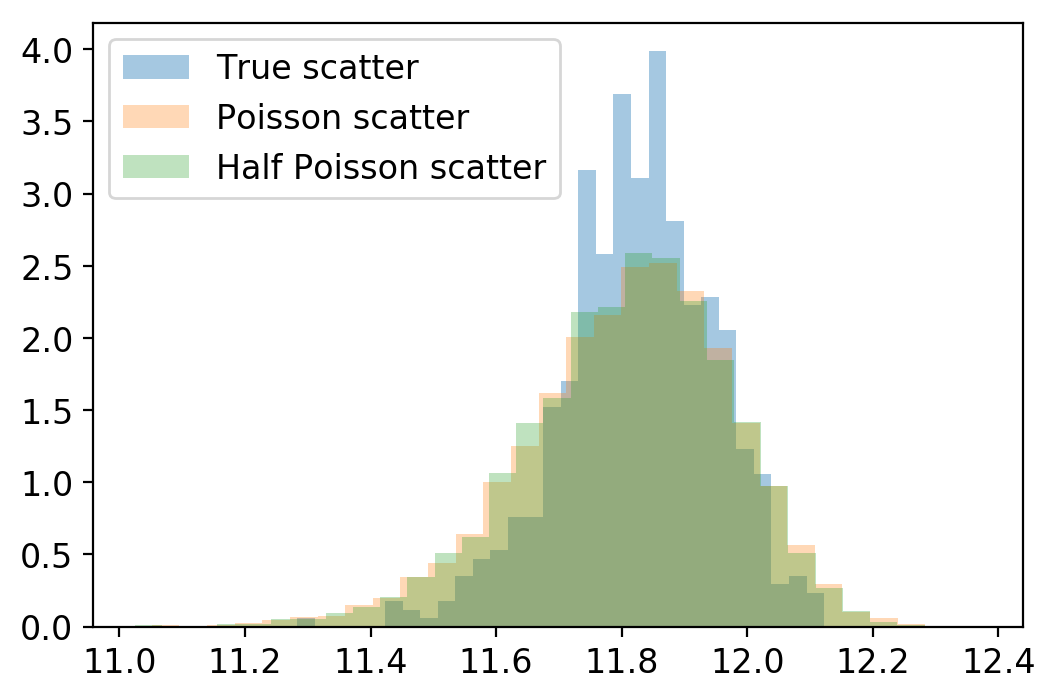

In [350]:
# Scatter in the current data set
_, ax = plt.subplots()
mass = np.log10(cut_sample_halo["sm"] + cut_sample_halo["icl"])
_, bins, _ = ax.hist(mass, bins=30, alpha=0.4, label="True scatter", density=True)

# Scatter in the resampled data set
full_poisson_masses, half_poisson_masses = [], []
for i in range(len(cut_sample_cen)):
    base_mass = cut_sample_cen[i]["sm"] + cut_sample_cen[i]["icl"]
    for i in range(10):
        chosen_sats = np.random.choice(sat_sample, np.random.poisson(num_sats[i]))
        additional_mass = np.sum(chosen_sats["sm"] + chosen_sats["icl"])
        full_poisson_masses.append(np.log10(base_mass + additional_mass))
        
        chosen_sats = np.random.choice(sat_sample, num_sats[i])
        additional_mass = np.sum(chosen_sats["sm"] + chosen_sats["icl"])
        half_poisson_masses.append(np.log10(base_mass + additional_mass))

ax.hist(full_poisson_masses, bins=30, alpha=0.3, label="Poisson scatter", density=True)
ax.hist(half_poisson_masses, bins=30, alpha=0.3, label="Half Poisson scatter", density=True)

ax.legend()

## Random sample per sub halo

Rather than sample from the full galaxy population (where there are **strong** conditional probablility because there are satellites of satellites), sample from the population of subhalos. So, sum all the stellar mass in a subhalo and call that 1 satellite.

This will have much weaker conditional probabilities as while there is large scale structure correlations I'm pretty sure this is weaker than the correlation of galaxies in the same halo.

Unfortuantely there is no way to find out which sub-subhalos are in a subhalo. The simulation just tracks halo ID and largest parent. Not the immediate parent.

## Random sampling per sat from similarly rich clusters

Ks_2sampResult(statistic=0.06049586776859506, pvalue=0.030138685813917345)


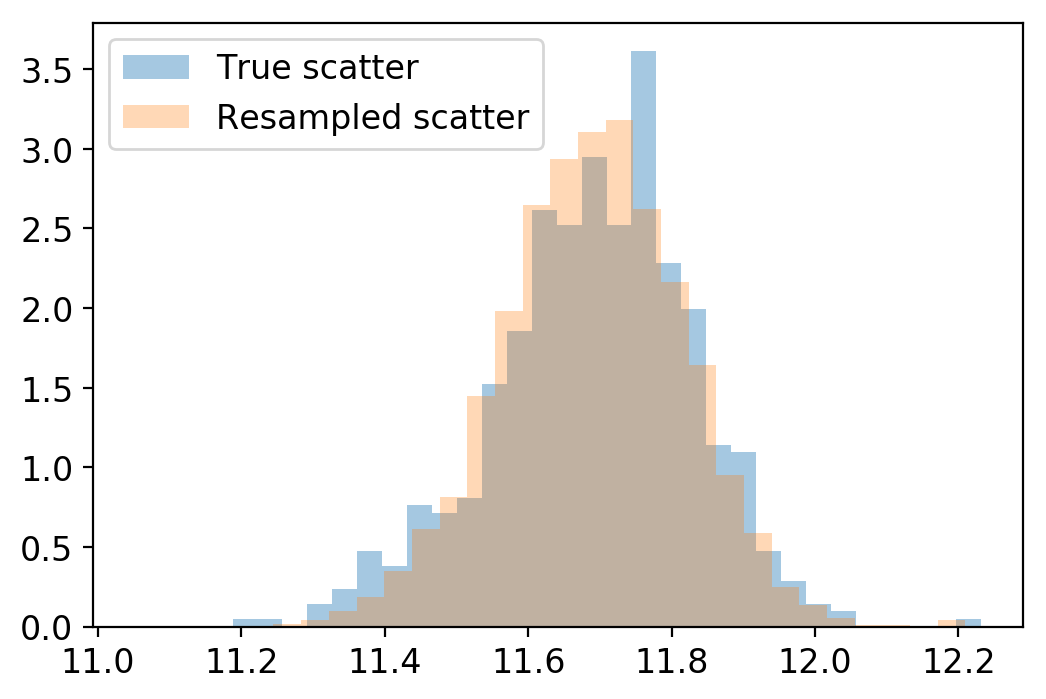

In [419]:
# Scatter in the current data set
_, ax = plt.subplots()
basic_scatter = np.log10(cut_sample_halo["sm"] + cut_sample_halo["icl"])
_, bins, _ = ax.hist(basic_scatter, bins=30, alpha=0.4, label="True scatter", density=True)

# Scatter in the resampled data set
half_poisson_masses, full_poisson_masses = [], []
for i in range(len(cut_sample_cen)):
    for _ in range(15):
        mass = cut_sample_cen[i]["sm"] + cut_sample_cen[i]["icl"]
        this_richness = num_sats[i]
        similarly_rich_indexes = (num_sats < 1.1*this_richness) & (num_sats > this_richness*0.9)
        for sat in range(15):
            mass += np.random.choice(most_massive_sats[sat][similarly_rich_indexes])
        half_poisson_masses.append(np.log10(mass))
        """
        mass = cut_sample_cen[i]["sm"] + cut_sample_cen[i]["icl"]
        for sat in range(15):
            mass += np.sum(np.random.choice(most_massive_sats[sat][similarly_rich_indexes], np.random.poisson(1)))
        full_poisson_masses.append(np.log10(mass))
        """
ax.hist(half_poisson_masses, bins=30, alpha=0.3, label="Resampled scatter", density=True)
#ax.hist(full_poisson_masses, bins=30, alpha=0.3, label="Resampled scatter w/ Poisson", density=True)
print(scipy.stats.ks_2samp(half_poisson_masses, basic_scatter))
ax.legend()

## The above doesn't work because our sampling model is too simple. Let's play with things

Text(0.05,0.8,'Slope = 0.002\nIntercept = 10.95\nR = 0.09')

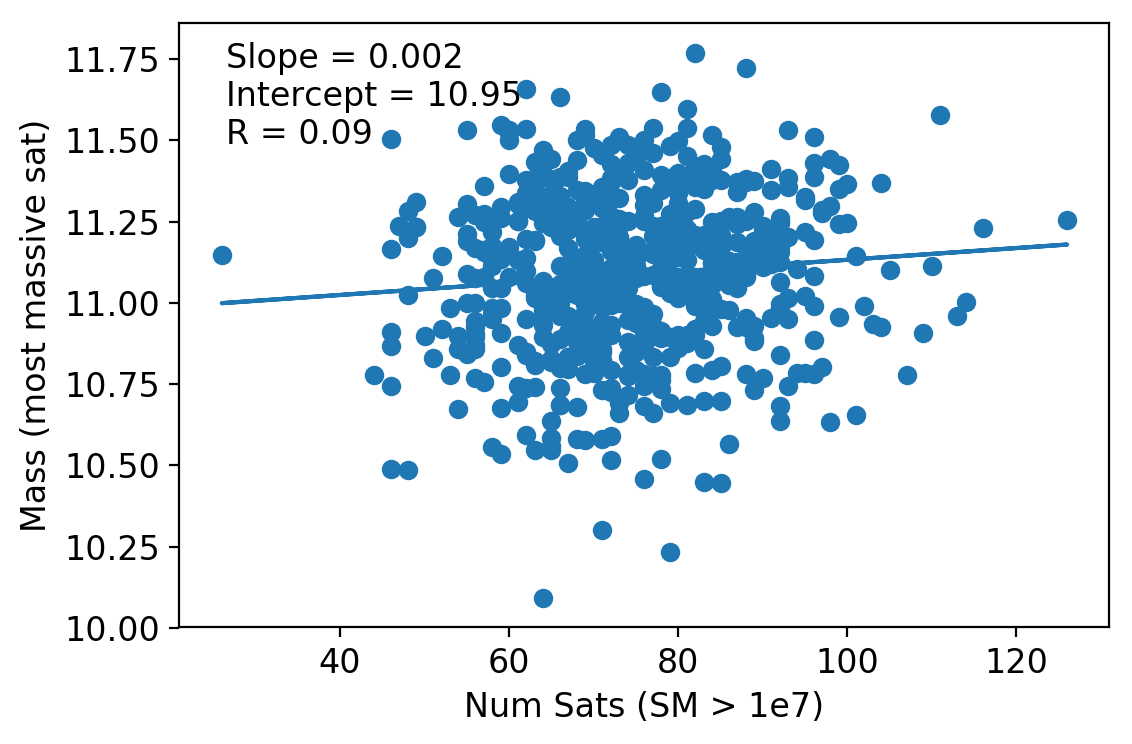

In [351]:
## Correlation between richness and max sat mass
_, ax = plt.subplots()

x, xlabel = num_sats, "Num Sats (SM > 1e7)"
y, ylabel = largest, "Mass (most massive sat)"

ax.scatter(x, y)
reg = scipy.stats.linregress(x, y)
ax.plot(x, reg.slope*x + reg.intercept)
ax.set(
    xlabel=xlabel,
    ylabel=ylabel,
)
ax.annotate(xy=(0.05, 0.8), xycoords="axes fraction", s="Slope = {:.3f}\nIntercept = {:.2f}\nR = {:.2f}".format(reg.slope, reg.intercept, reg.rvalue))

Text(0.05,0.8,'Slope = 0.662\nIntercept = 4.24\nR = 0.79')

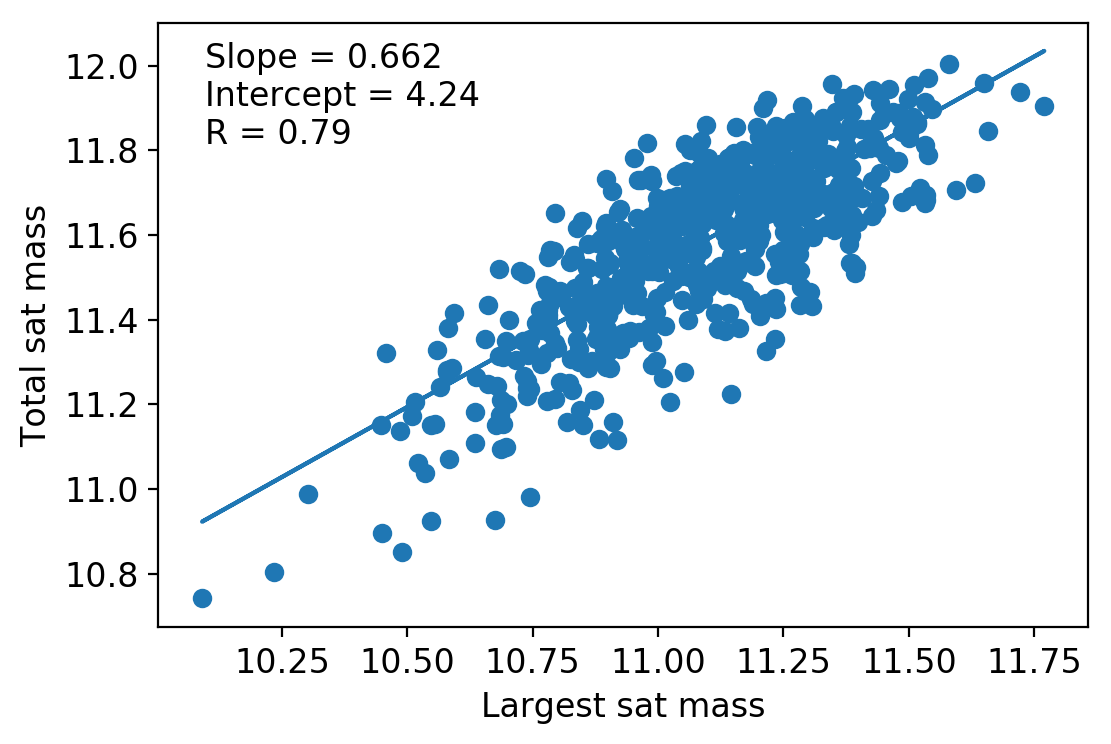

In [352]:
_, ax = plt.subplots()

y, ylabel = total_sat_mass, "Total sat mass"
x, xlabel = largest, "Largest sat mass"

ax.scatter(x, y)
reg = scipy.stats.linregress(x, y)
ax.plot(x, reg.slope*x + reg.intercept)
ax.set(
    xlabel=xlabel,
    ylabel=ylabel,
)
ax.annotate(xy=(0.05, 0.8), xycoords="axes fraction", s="Slope = {:.3f}\nIntercept = {:.2f}\nR = {:.2f}".format(reg.slope, reg.intercept, reg.rvalue))

Text(0.05,0.8,'Slope = 0.283\nIntercept = 6.52\nR = 0.20')

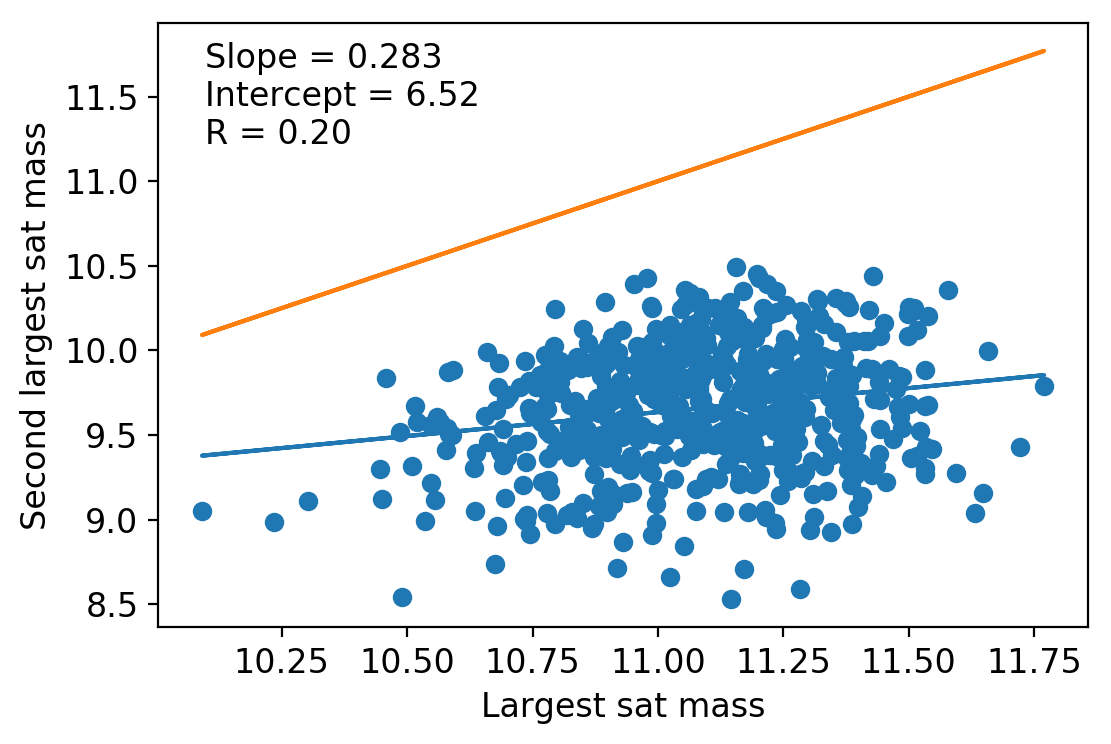

In [362]:
_, ax = plt.subplots()

y, ylabel = twenty_largest, "Second largest sat mass"
x, xlabel = largest, "Largest sat mass"

ax.scatter(x, y)
reg = scipy.stats.linregress(x, y)
ax.plot(x, reg.slope*x + reg.intercept)
ax.plot(x, x)
ax.set(
    xlabel=xlabel,
    ylabel=ylabel,
)
ax.annotate(xy=(0.05, 0.8), xycoords="axes fraction", s="Slope = {:.3f}\nIntercept = {:.2f}\nR = {:.2f}".format(reg.slope, reg.intercept, reg.rvalue))

# What could cause the scatter in the SMHR?

## Lasso to find the best linear model

Using log10(alpha) of -3.5
[ 0.          0.24721144 -0.03445186  0.01277936 -0.42243104] 0.15241898176225052


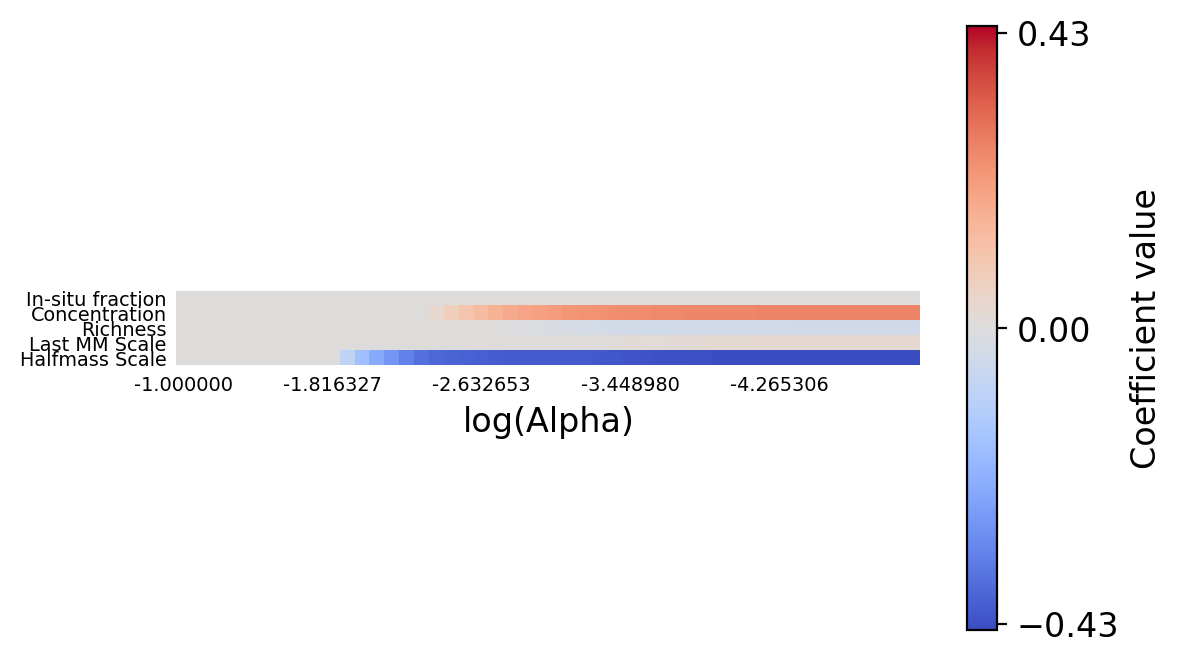

In [323]:
weights, intercept = p.physical_correlation_plots.lasso(data_halo_cut["cen"])
print(weights, intercept)

Using log10(alpha) of -3.5


(array([ 0.1758792 , -0.        ,  0.22957802,  0.11525692, -0.10350068]),
 -0.15263275335489765)

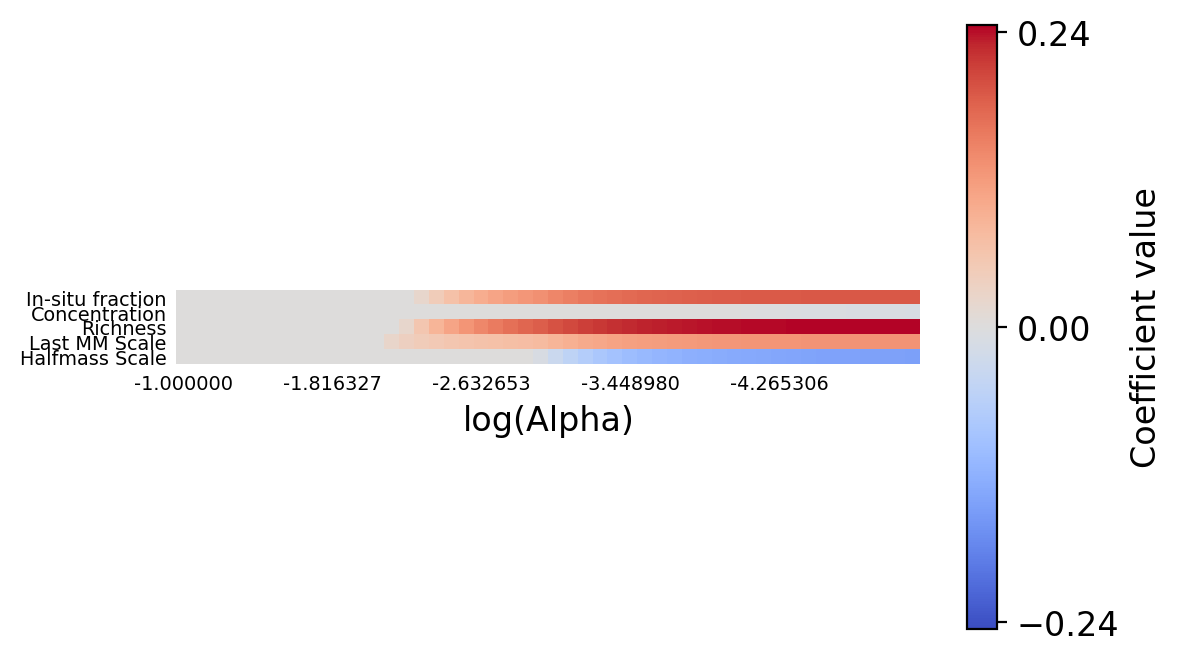

In [324]:
p.physical_correlation_plots.lasso(data_halo_cut["halo"])

## Correlation plots

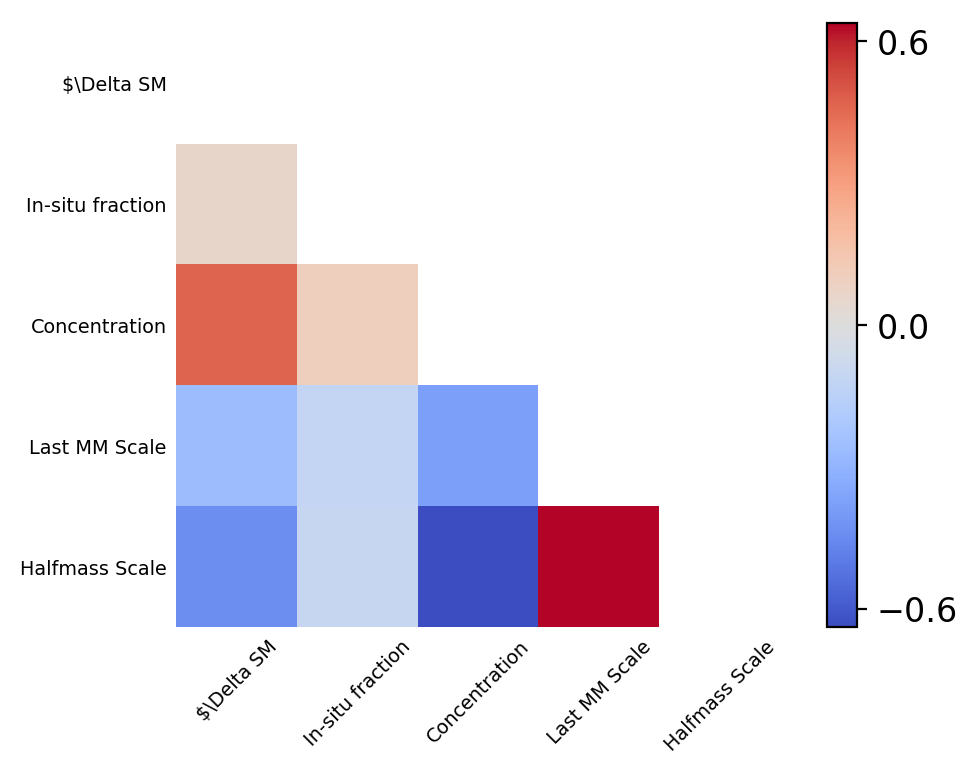

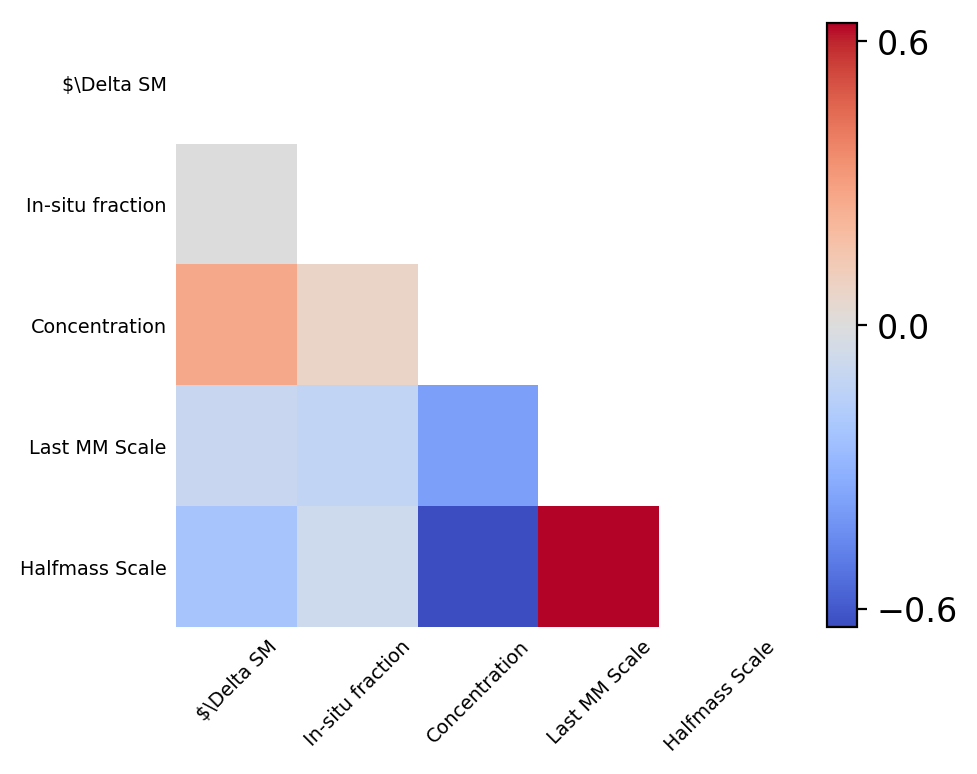

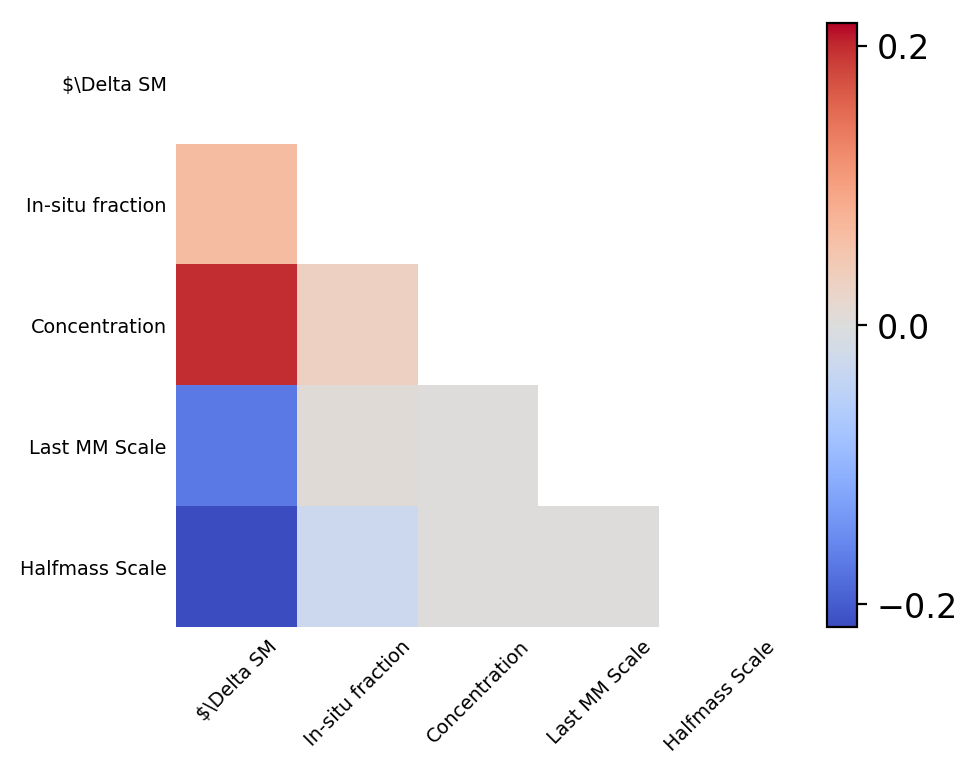

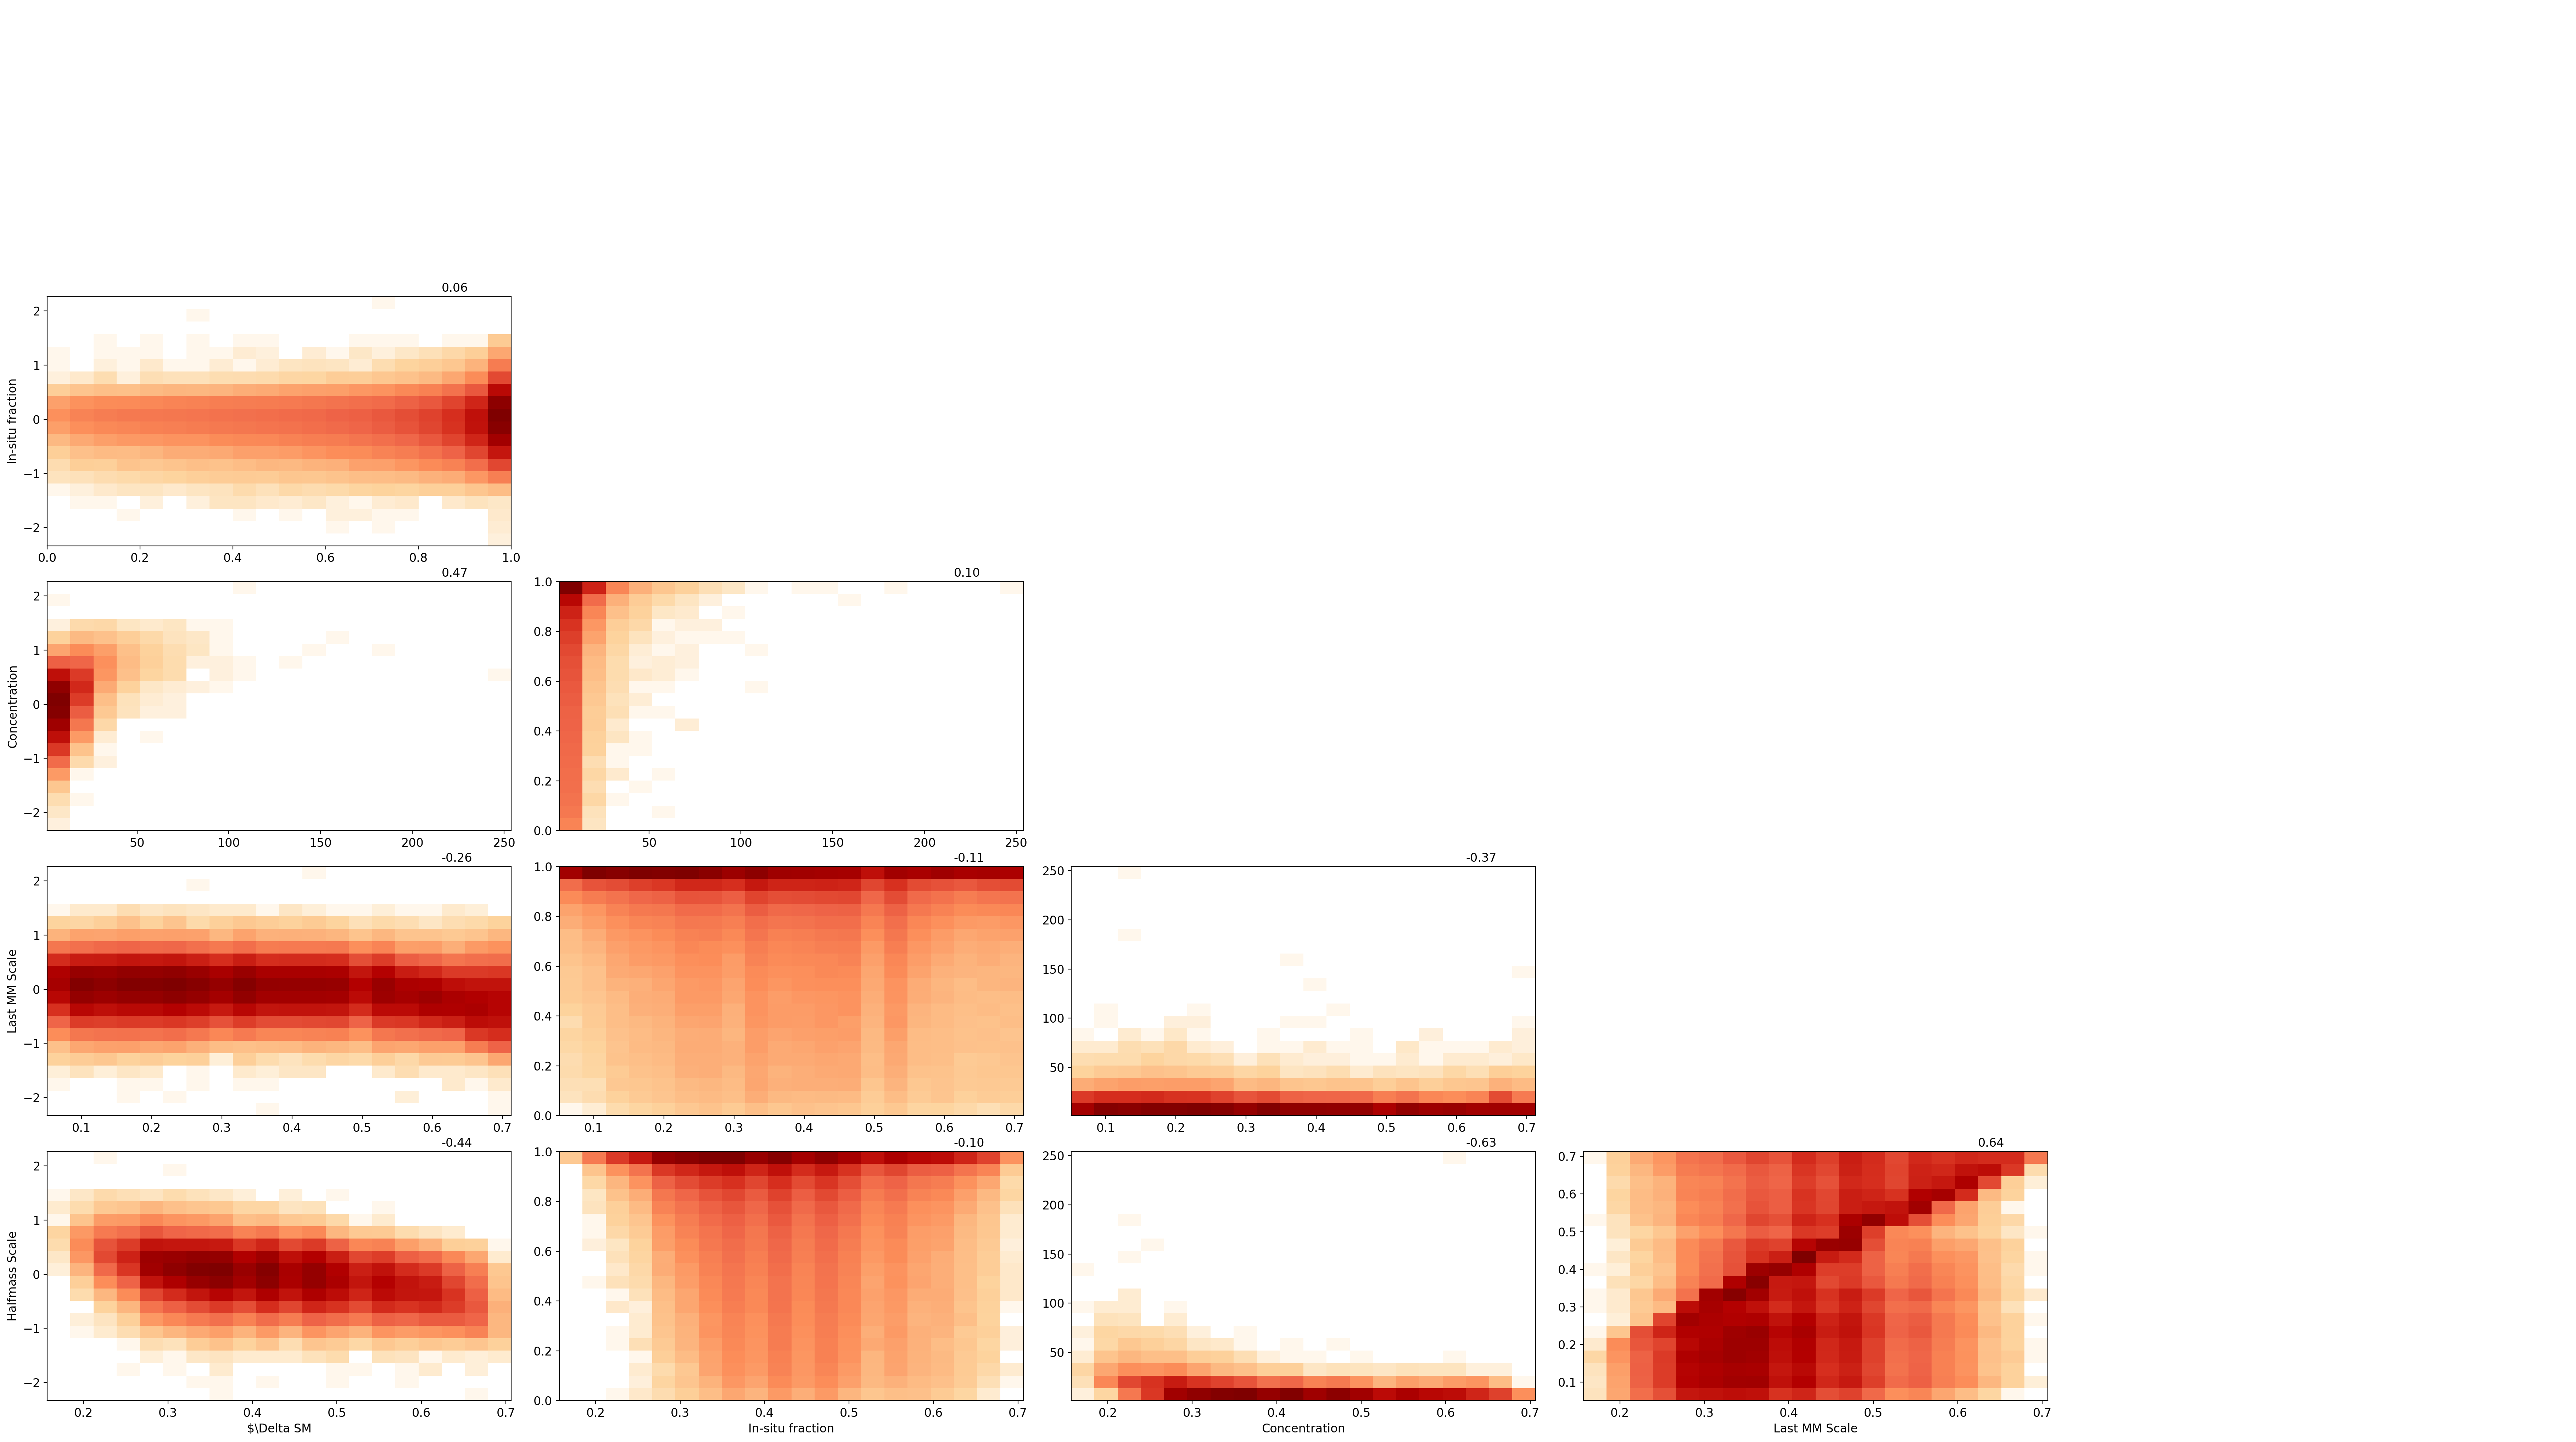

In [180]:
p.physical_correlation_plots.correlation_matrix(data_halo_cut["cen"])
p.physical_correlation_plots.correlation_matrix(data_halo_cut["halo"])
p.physical_correlation_plots.cen_vs_halo_correlation_matrix(data_halo_cut["cen"], data_halo_cut["halo"])
p.physical_correlation_plots.marginalized_heatmap(data_halo_cut["cen"])

## Use best model to predict SM bias

Using log10(alpha) of -3.5
[0.2686521  0.25145234 0.09215359]


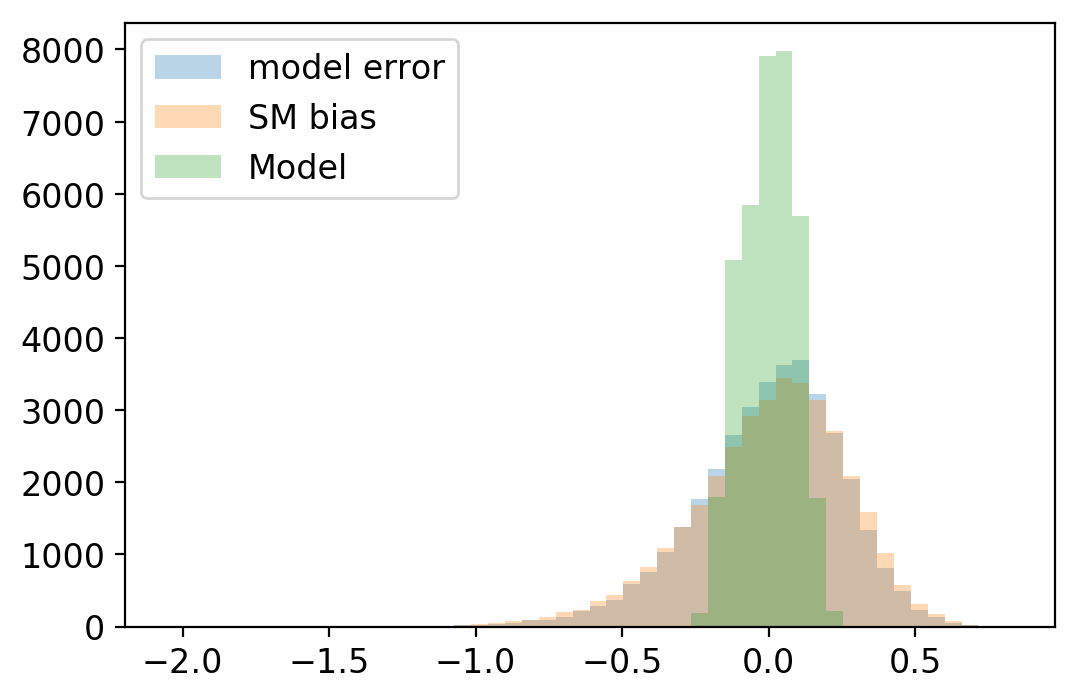

In [325]:
p.physical_correlation_plots.margin_model(data_halo_cut["cen"])

Using log10(alpha) of -3.5
[0.08868529 0.08436131 0.023891  ]


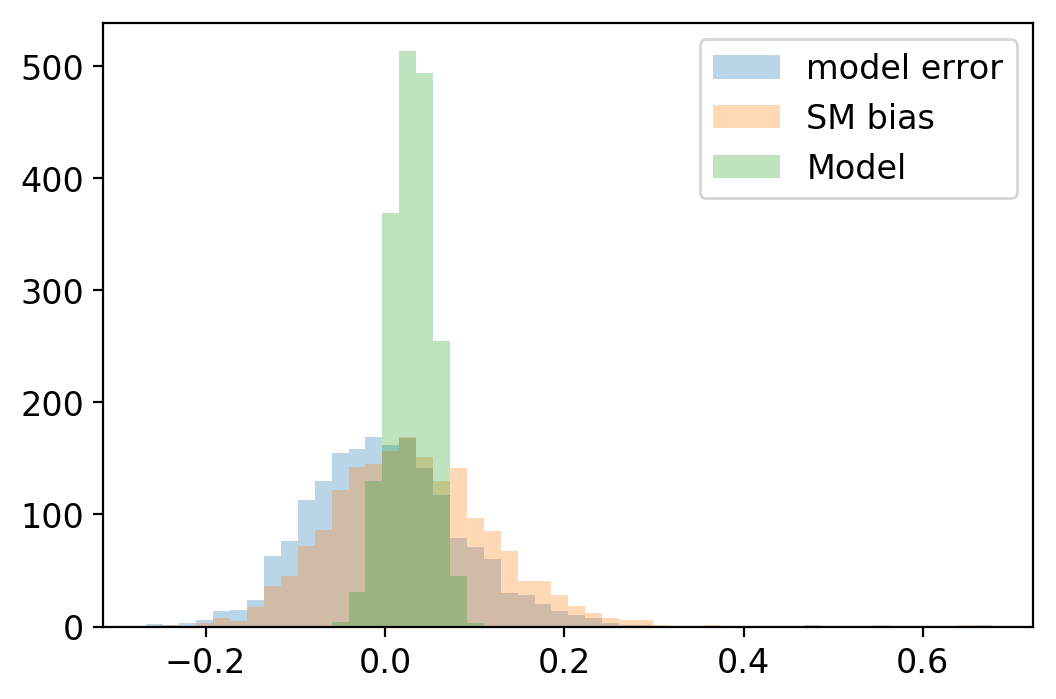

In [318]:
p.physical_correlation_plots.margin_model(data_halo_cut["halo"])


    This is the issue - even though when binned you see a nice trend,
    there is a massive amount of variance in each bin still. Increasing the number of
    features we build out linear model on doesn't appear to significantly improve this.
    Or maybe I haven't yet tried the right features.
    


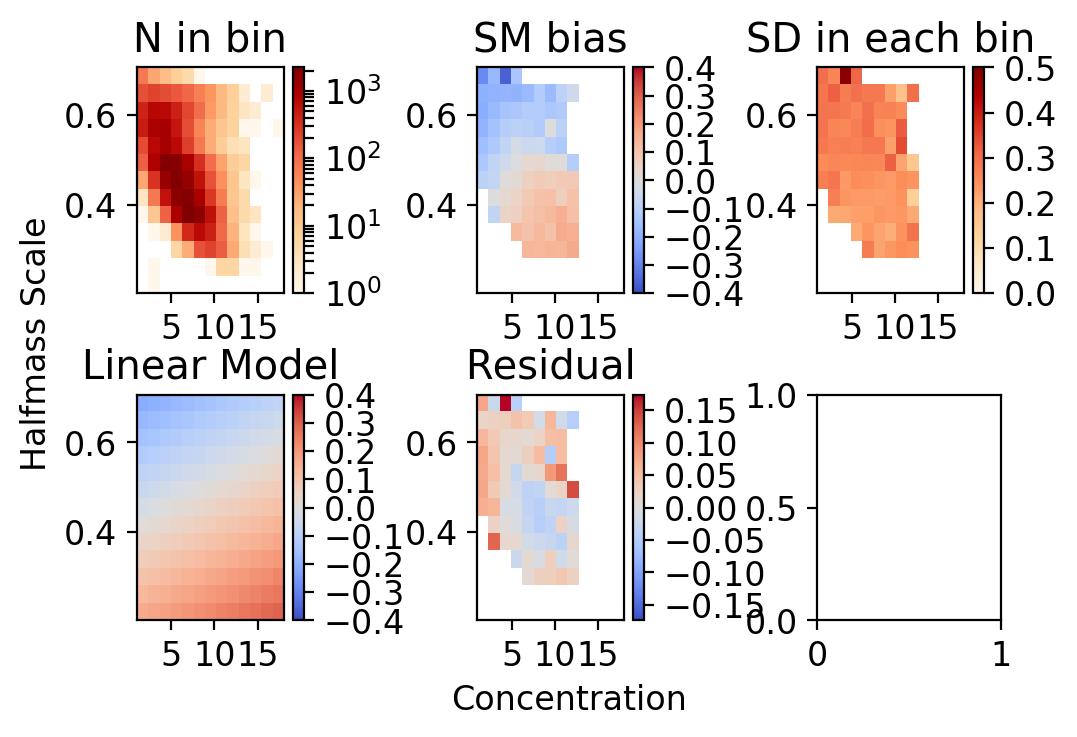

In [321]:
p.physical_correlation_plots.best_model(data_halo_cut["cen"])

# Concentration - is that correlated with over/undermassive halos

Same as richness but for concentration

[1.0, 3.0, 7.0, 19.0]


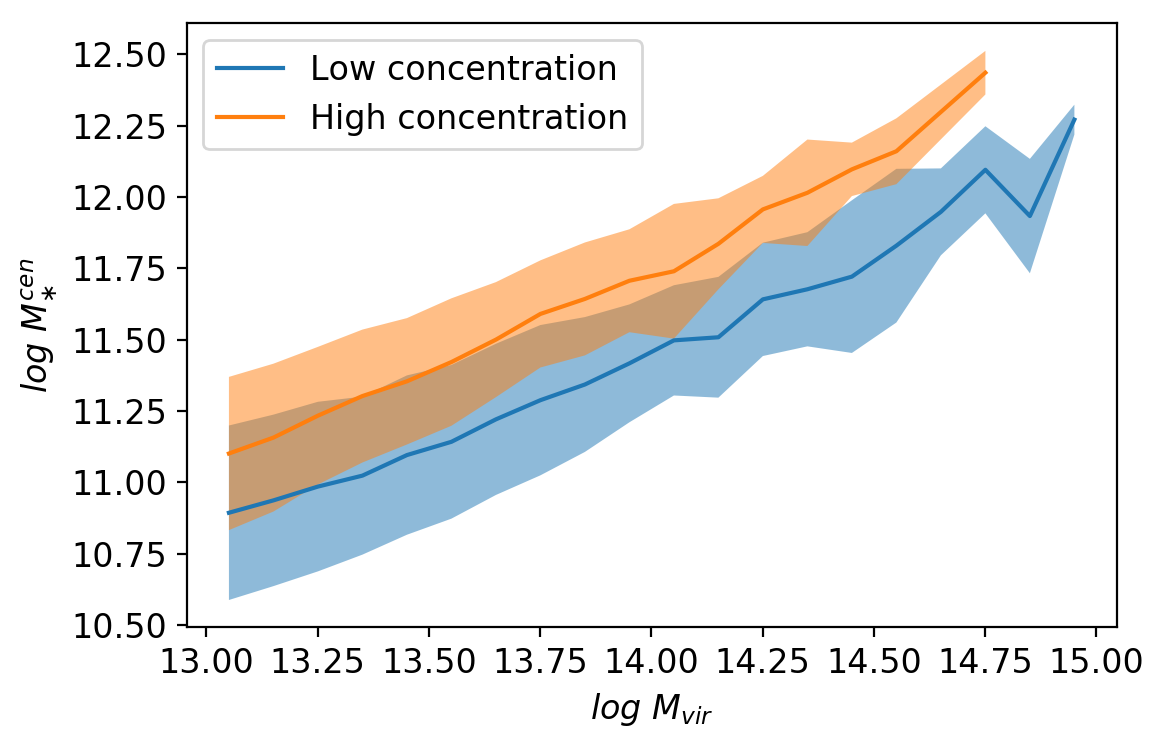

In [297]:
p.physical_correlation_plots.sm_at_fixed_hm_conc_split(data_halo_cut["cen"])

(2, 36491)
[[0.07217593 0.1604215 ]
 [0.1604215  4.37972125]]


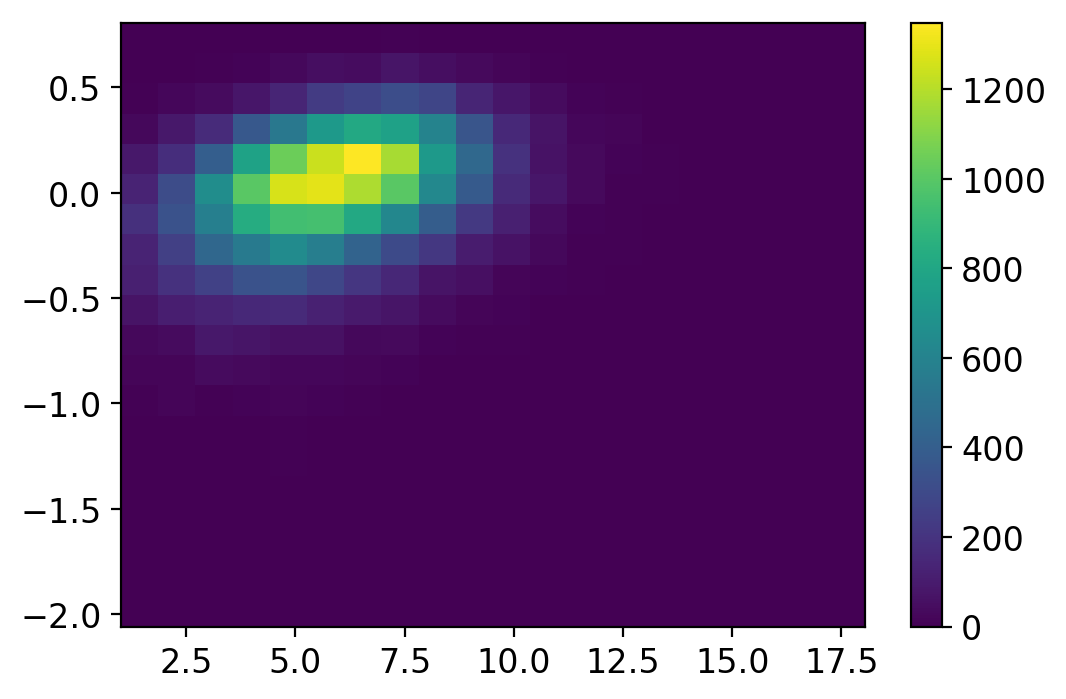

In [296]:
p.physical_correlation_plots.conc_sm_heatmap_at_fixed_hm(data_halo_cut["cen"])

# Age

What about age?

# Comparison of secondary feature distribution

Let's look at how a selection on stellar mass could bias the secondary features.
1. Select a sample by cutting on some variant of SM
2. Select a sample by matching the halo mass distribution of 1
3. Compare features of 1 and 2

## Concentration

central cuts of (11.9, 12.1), halo cuts of (12.381924963554994, 12.625441400057763)
SM sample size: 502	SM median halo mass: 1.67e+14	SM std halo mass: 1.17e+14
SM sample size: 490	SM median halo mass: 2.13e+14	SM std halo mass: 5.23e+13


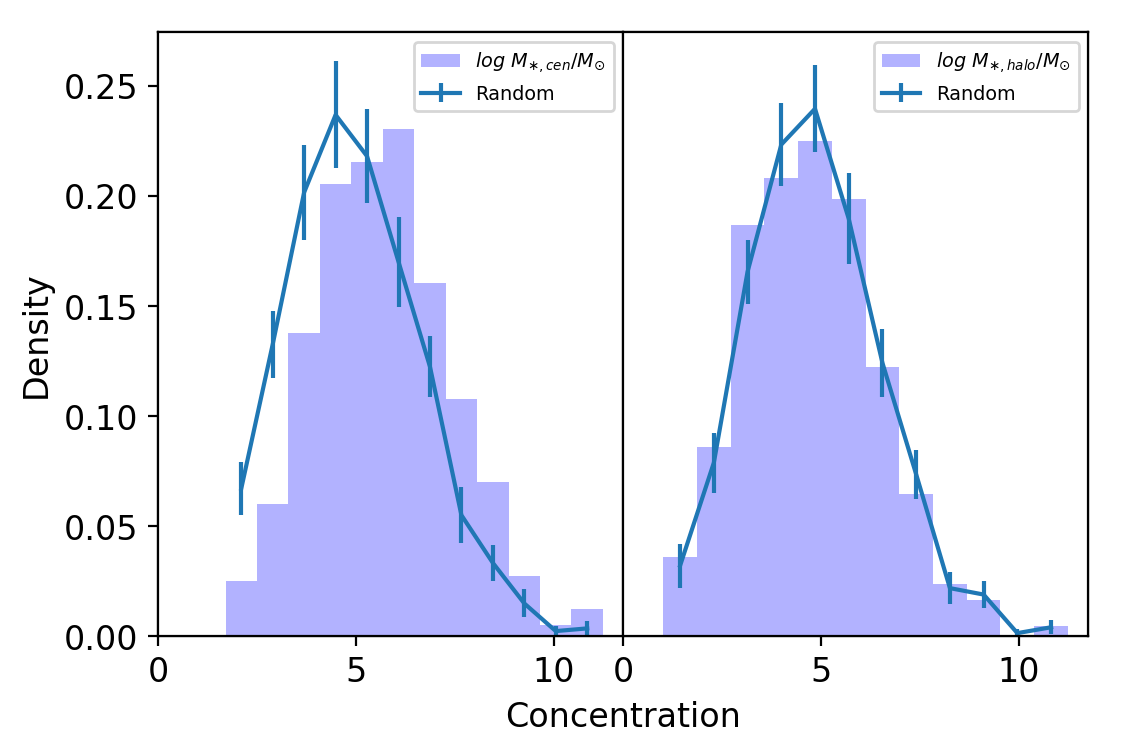

In [75]:
cen_cuts = (11.9, 12.1)
halo_cuts = tuple(fits.mass_at_density(data_stellar_cut, "halo", fits.density_at_mass(
        data_stellar_cut, "cen", m)) for m in cen_cuts)
print("central cuts of {}, halo cuts of {}".format(cen_cuts, halo_cuts))

fig = plt.figure()
big_ax = fig.add_subplot(111)
big_ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off') 
big_ax.grid(False)                                                                      

axes = [fig.add_subplot(121), fig.add_subplot(122)]
axes[1].set_yticks([])
fig.subplots_adjust(wspace=0, hspace=0)

f = p.same_hm_dist_plots.f_concentration
p.same_hm_dist_plots.plot_pdf(data_stellar_cut, data_halo_cut, "cen", f, cuts=cen_cuts, ax=axes[0], bins=12)
p.same_hm_dist_plots.plot_pdf(data_stellar_cut, data_halo_cut, "halo", f, cuts=halo_cuts, ax=axes[1], bins=12)

big_ax.set(**{"xlabel": "Concentration"})
axes[0].set(**{"ylabel": "Density"})
for ax in [axes[0], axes[1]]:
    ax.set(**{"xlim": (0, max(axes[0].get_xlim()[1], axes[1].get_xlim()[1])), 
              "ylim": (0, max(axes[0].get_ylim()[1], axes[1].get_ylim()[1]))})

SM sample size: 490	SM median halo mass: 2.13e+14	SM std halo mass: 5.23e+13
Ks_2sampResult(statistic=0.026530612244897972, pvalue=0.9947503939616574)
4.704847670664435 4.6788492017662895


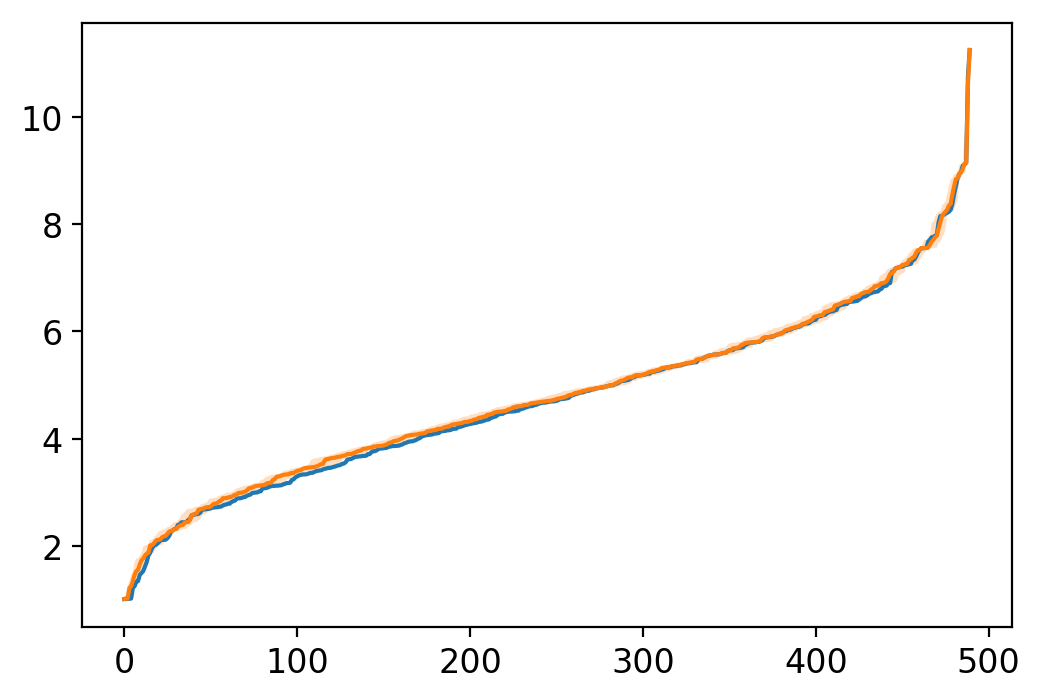

In [30]:
p.same_hm_dist_plots.plot_cdf(data_stellar_cut, data_halo_cut, "halo", p.same_hm_dist_plots.f_concentration, cuts=halo_cuts)

## Median shift

In [38]:
for f_name in ["f_concentration","f_age", "f_mm", "f_acc"]:
    p.same_hm_dist_plots.calc_median_shift(data_stellar_cut, data_halo_cut, "halo", getattr(p.same_hm_dist_plots, f_name), cuts=halo_cuts)
    p.same_hm_dist_plots.calc_median_shift(data_stellar_cut, data_halo_cut, "cen", getattr(p.same_hm_dist_plots, f_name), cuts=cen_cuts)

SM sample size: 490	SM median halo mass: 2.13e+14	SM std halo mass: 5.23e+13
4.6788492017662895 4.720896539129835 -0.04204733736354527
SM sample size: 502	SM median halo mass: 1.67e+14	SM std halo mass: 1.17e+14
5.5982941631011744 4.808489725797182 0.7898044373039923
SM sample size: 490	SM median halo mass: 2.13e+14	SM std halo mass: 5.23e+13
0.4946875601827701 0.49379604263133714 0.0008915175514329632
SM sample size: 502	SM median halo mass: 1.67e+14	SM std halo mass: 1.17e+14
0.45099766746587155 0.4904907352177459 -0.03949306775187433
SM sample size: 490	SM median halo mass: 2.13e+14	SM std halo mass: 5.23e+13
0.4637056745900309 0.45478551175323334 0.008920162836797585
SM sample size: 502	SM median halo mass: 1.67e+14	SM std halo mass: 1.17e+14
0.34968796566025157 0.4477424656197899 -0.09805449995953835
SM sample size: 490	SM median halo mass: 2.13e+14	SM std halo mass: 5.23e+13
Some here are less than 0


/home/christopher/research/hsc_um2/cb/plots/same_hm_dist_plots.py:167: RuntimeWarning: invalid value encountered in log10
  smooth_ages = np.copy(ages).flatten()


Some here are less than 0
1.0228302347503115 1.0056271014624665 0.017203133287845063
SM sample size: 502	SM median halo mass: 1.67e+14	SM std halo mass: 1.17e+14
Some here are less than 0
Some here are less than 0
0.7527695695723358 0.9360420555693854 -0.1832724859970496


## KS test

In [91]:
p.same_hm_dist_plots.compute_acc_gammas(data_halo_cut["cen"]["data"])

array([1.22440716, 0.15485091])

In [ ]:
res = []
keys = ['cen', 1, 2, 5, 'halo']
labels = ["Concentration", "Halfmass Scale", "Last MM Scale", "Accretion Rate"]
cuts = [(11.3, 11.31), (11.9, 12)]


for cut in cuts:
    res.append([])
    for f_name in ["f_concentration", "f_age", "f_mm", "f_age"]:
        res[-1].append([])
        for k in keys:
            c = tuple(fits.mass_at_density(data_stellar_cut, k, fits.density_at_mass(
                data_stellar_cut, "cen", m)) for m in cut)
            sig = p.same_hm_dist_plots.ks_test(data_stellar_cut, data_halo_cut, k, getattr(p.same_hm_dist_plots, f_name), cuts=c)
            res[-1][-1].append(sig)

[6.292287934806858e-14, 3.788939337944048e-14, 1.4075884757726595e-07, 8.275012109183714e-10, 4.5727678259541715e-12, 6.663008052521676e-08]
[0.6918125188463162, 0.14992211478178552, 0.0002636289885159015, 0.35089822779033997, 0.9999855807358778, 0.3719388843264942]


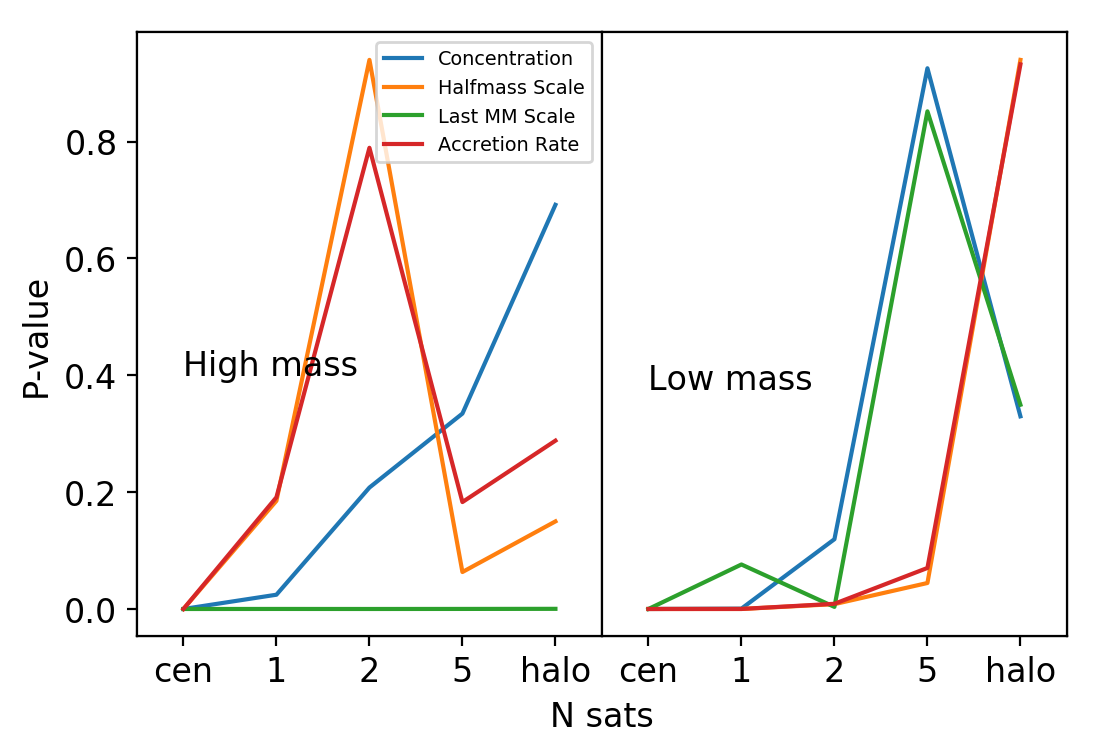

In [206]:
fig = plt.figure()
big_ax = fig.add_subplot(111)
big_ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off') 
big_ax.grid(False)                                                                      

axes = [fig.add_subplot(121), fig.add_subplot(122)]
axes[1].set_yticks([])
fig.subplots_adjust(wspace=0, hspace=0)

print([res[i][j][0] for i in range(2) for j in range(3)])
print([res[i][j][-1] for i in range(2) for j in range(3)])


for i in range(len(res[0])):
    l = axes[0].plot(res[0][i], label=labels[i])[0]
    axes[1].plot(res[1][i], color=l.get_color())[0]

big_ax.set(
    ylabel="P-value",
    xlabel="N sats",
)
text = ["High mass", "Low mass"]
for i in range(len(axes)):
    axes[i].set(
        xticks=l.get_xdata(),
        xticklabels=keys,
        xlim=(-0.5, 4.5),
    )
    axes[i].text(0, 0.4, text[i])

axes[0].legend(fontsize="xx-small")

## Age

SM sample size: 500	SM median halo mass: 1.67e+14	SM std halo mass: 1.16e+14
SM sample size: 509	SM median halo mass: 2.12e+14	SM std halo mass: 5.41e+13


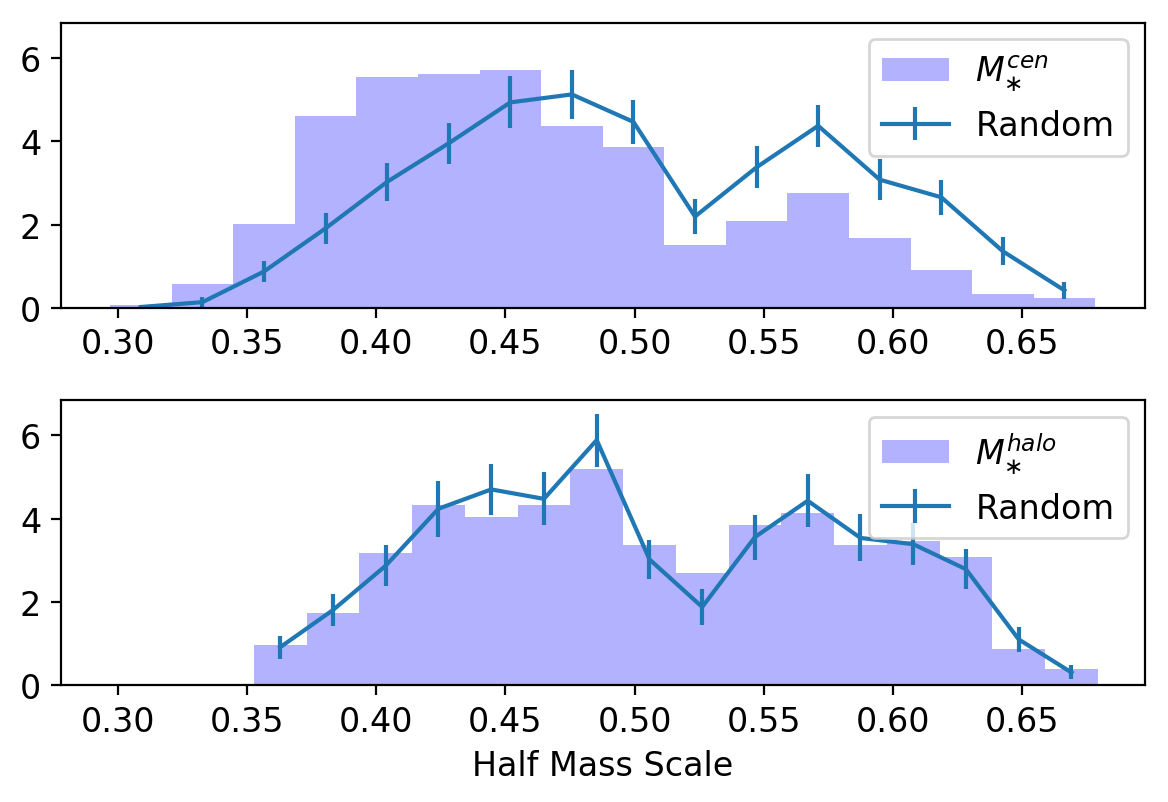

In [216]:
# Remember that the way we are binning this is a bit subtle
_, axes = plt.subplots(2, 1)
p.same_hm_dist_plots.plot_pdf(data_halo_cut, "cen", p.same_hm_dist_plots.f_age, cuts=cen_cuts, ax=axes[0], bins=16)
p.same_hm_dist_plots.plot_pdf(data_halo_cut, "halo", p.same_hm_dist_plots.f_age, cuts=halo_cuts, ax=axes[1], bins=16)
plt.tight_layout()
axes[1].set(**{"xlabel": "Half Mass Scale"})
for ax in [axes[0], axes[1]]:
    ax.set(**{"xlim": (min(axes[0].get_xlim()[0], axes[1].get_xlim()[0]), max(axes[0].get_xlim()[1], axes[1].get_xlim()[1])), 
              "ylim": (0, max(axes[0].get_ylim()[1], axes[1].get_ylim()[1]))})

SM sample size: 509	SM median halo mass: 2.12e+14	SM std halo mass: 5.41e+13
Ks_2sampResult(statistic=0.03339882121807469, pvalue=0.935221521170702)


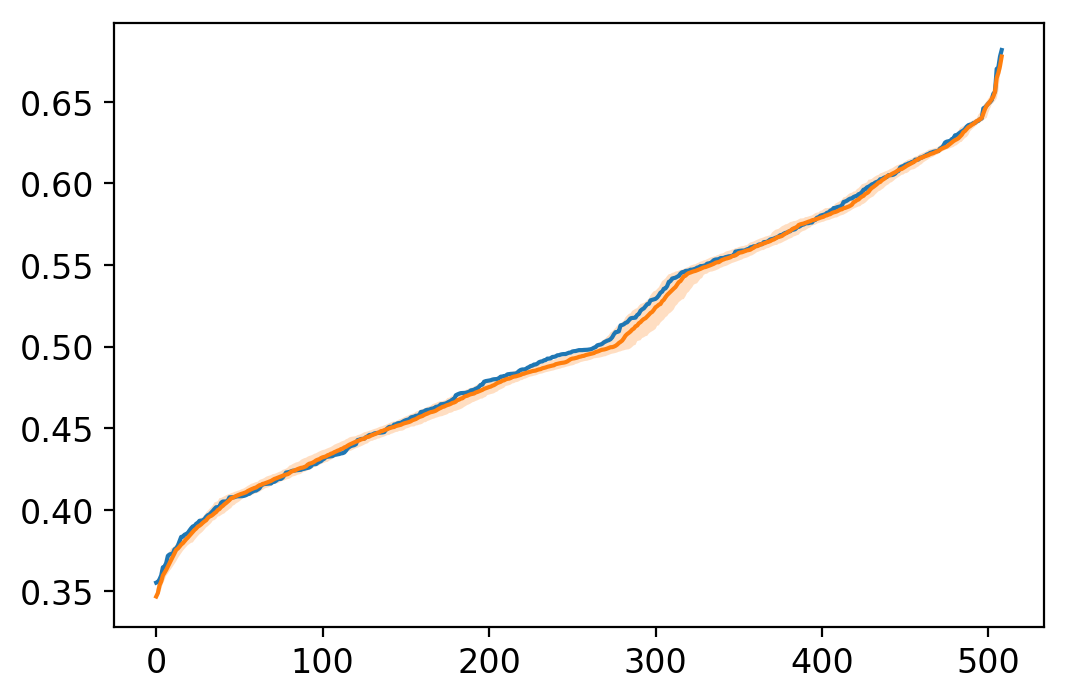

In [219]:
p.same_hm_dist_plots.plot_cdf(data_halo_cut, "halo", p.same_hm_dist_plots.f_age, cuts=halo_cuts)

## MM

NameError: name 'cen_cuts' is not defined

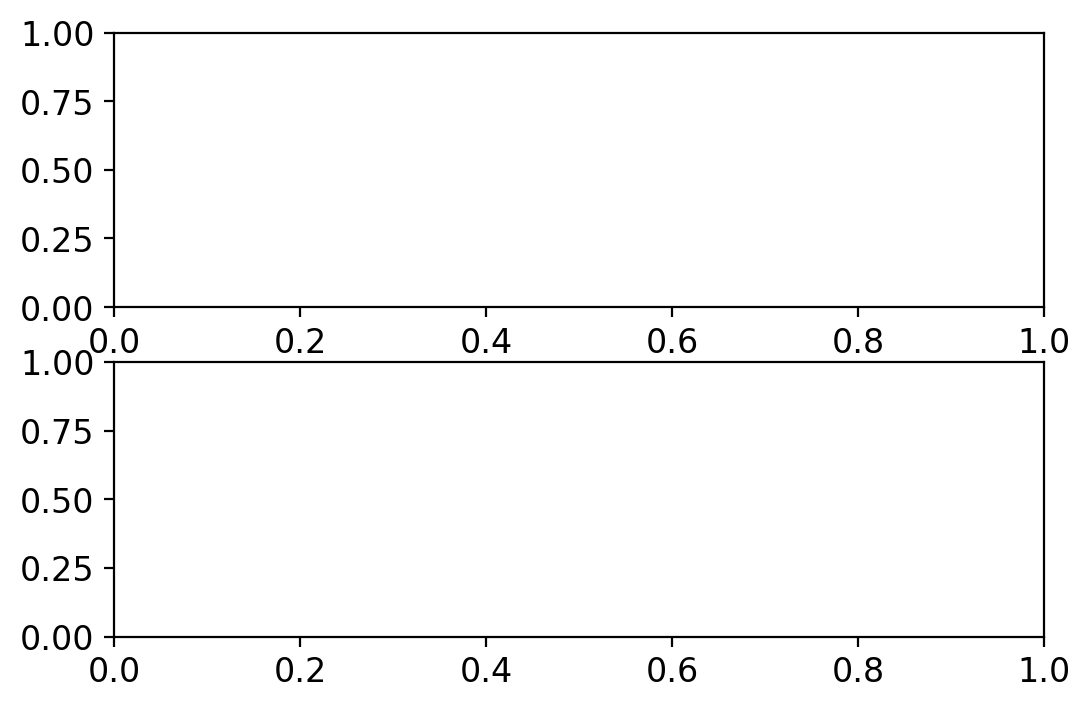

In [237]:
# Remember that the way we are binning this is a bit subtle
_, axes = plt.subplots(2, 1)
p.same_hm_dist_plots.plot_pdf(data_halo_cut, "cen", p.same_hm_dist_plots.f_mm, cuts=cen_cuts, ax=axes[0], bins=16)
p.same_hm_dist_plots.plot_pdf(data_halo_cut, "halo", p.same_hm_dist_plots.f_mm, cuts=halo_cuts, ax=axes[1], bins=16)
plt.tight_layout()
axes[1].set(**{"xlabel": "Scale of Last Major Merger"})
for ax in [axes[0], axes[1]]:
    ax.set(**{"xlim": (min(axes[0].get_xlim()[0], axes[1].get_xlim()[0]), max(axes[0].get_xlim()[1], axes[1].get_xlim()[1])), 
              "ylim": (0, max(axes[0].get_ylim()[1], axes[1].get_ylim()[1]))})

SM sample size: 509	SM median halo mass: 2.12e+14	SM std halo mass: 5.41e+13
Ks_2sampResult(statistic=0.04715127701375246, pvalue=0.6133971738415919)


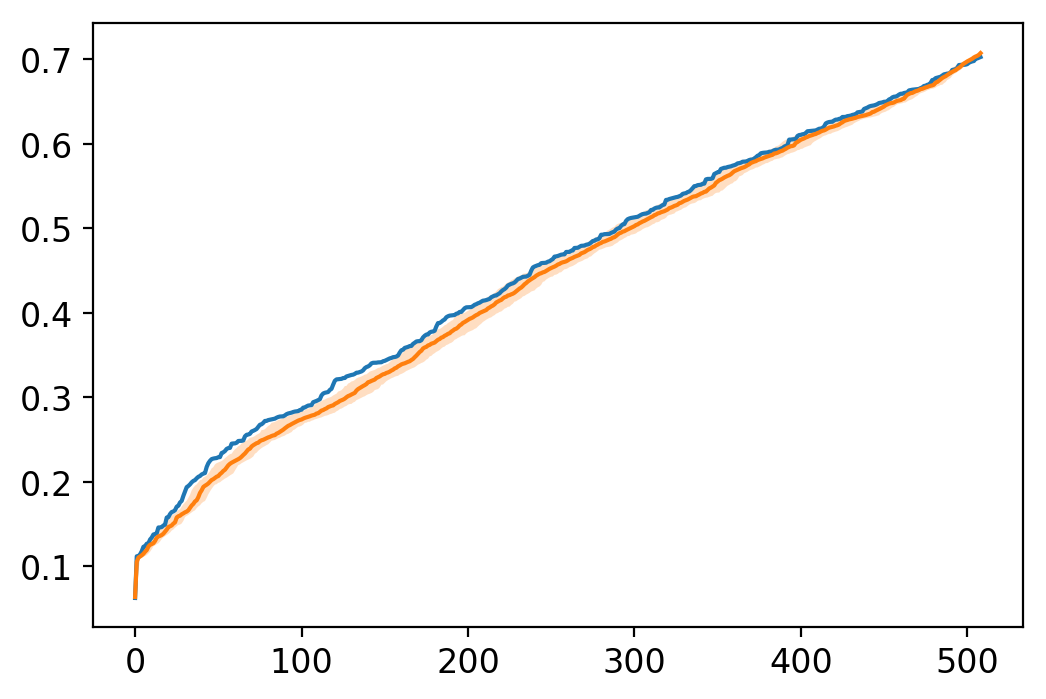

In [278]:
p.same_hm_dist_plots.plot_cdf(data_halo_cut, "halo", p.same_hm_dist_plots.f_mm, cuts=halo_cuts)

## Sanity check of how we bin discrete scales

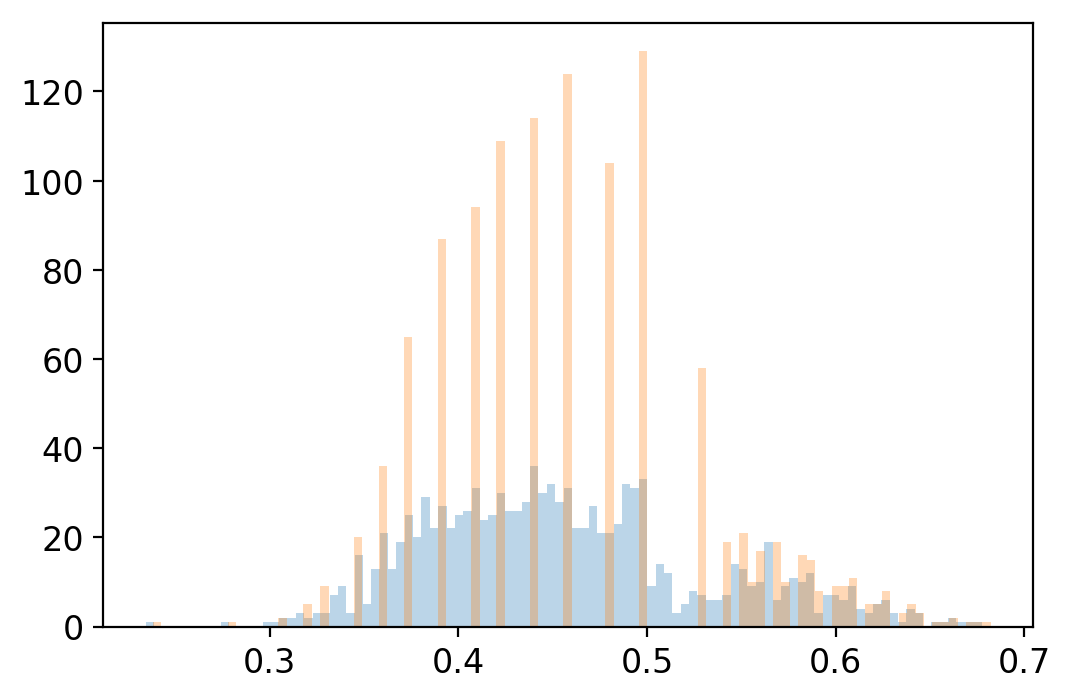

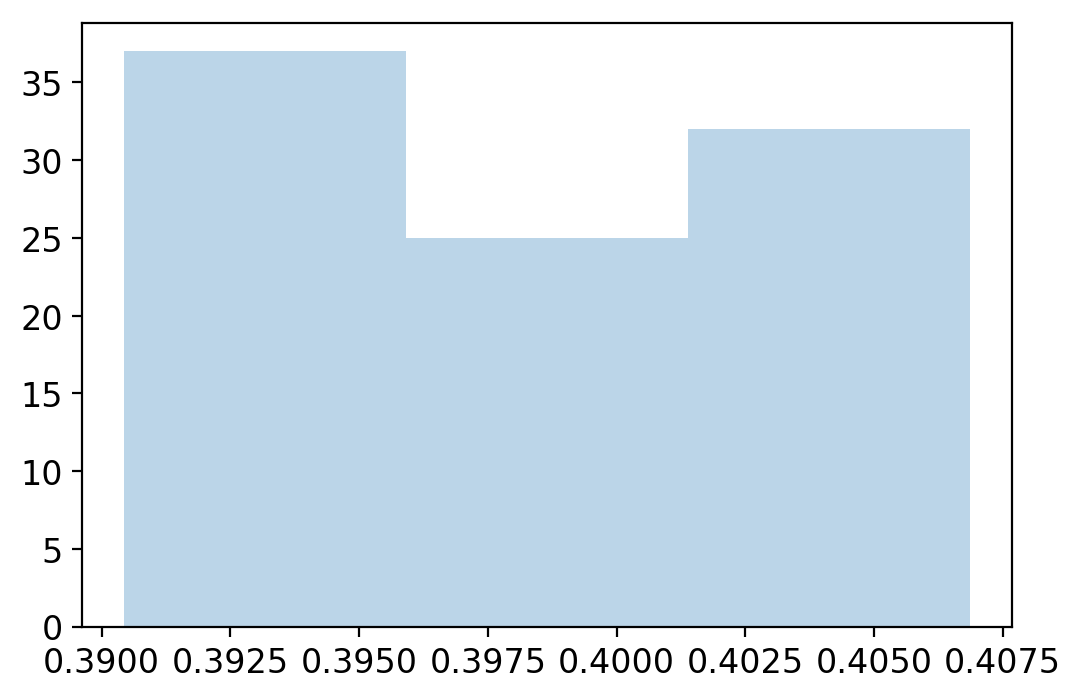

In [108]:
cuts = (11.8, 12.2)
catalog = data_halo_cut["cen"]["data"]
sm_sample = catalog[
    (catalog["sm"] + catalog["icl"] > 10**cuts[0]) & 
    (catalog["sm"] + catalog["icl"] < 10**cuts[1])   
]                   

p.same_hm_dist_plots.f_age(sm_sample, plot=True)
None

# Arb

## Alexies requests

See discussion in the Enia/Alexie/Me channel around Apr 24

In [184]:
def imshow(ax, binned_stats, **kwargs):
    return ax.imshow(
            binned_stats.statistic.T,
            origin="lower",
            extent=[binned_stats.x_edge[0], binned_stats.x_edge[-1], binned_stats.y_edge[0], binned_stats.y_edge[-1]],
            aspect="auto",
            **kwargs,
    )

In [43]:
# when the Gamma's are properly normalized, can you make a figure of how the mass gap (M*_central - M*_second most massive) correlates with accretion rate?
sample = data_stellar_cut["cen"]["data"]
gammas = p.same_hm_dist_plots.f_acc(sample)
mag_gap = data_stellar_cut["cen"]["mag_gap"]

indexes = (~np.isnan(gammas)) & (mag_gap > 0) #& (gammas > 0) & (gammas < 5)
gammas = gammas[indexes]
mag_gap = mag_gap[indexes]
masses = sample["sm"][indexes] + sample["icl"][indexes]

# Joined stuff
joined_sample = data.unify(data_stellar_cut, "cen", "halo")
joined_sample = joined_sample.rename(columns = {
    "m_cen": "m",
    "Acc_Rate_1*Tdyn_cen": "Acc_Rate_1*Tdyn",
}) # Need to do this for the f_acc func to find the cols
j_gammas = p.same_hm_dist_plots.f_acc(joined_sample)


j_halo_mass = joined_sample["sm_halo"] + joined_sample["icl_halo"]
j_cen_mass = joined_sample["sm_cen"] + joined_sample["icl_cen"]

indexes = (~np.isnan(j_gammas))
print(np.count_nonzero(indexes) / len(indexes))
j_gammas = j_gammas[indexes]
j_halo_mass = j_halo_mass[indexes]
j_cen_mass = j_cen_mass[indexes]
joined_sample = joined_sample[indexes]

23 here are less than 0
22 here are less than 0
1.0


/home/christopher/research/hsc_um2/cb/plots/same_hm_dist_plots.py:174: RuntimeWarning: invalid value encountered in log10
  np.log10(sample["m"]) - np.log10(sample["m"] - delta_mass)) / (


In [240]:
joined_sample[(np.log10(j_halo_mass) > 12.5) & (np.log10(j_cen_mass) < 11.3)].head() # These are weird fuckers

,id_cen,upid_cen,x_cen,y_cen,z_cen,m,mp_cen,sm_cen,icl_cen,sfr_cen,...,Halfmass_Scale_halo,scale_of_last_MM_halo,M200b_halo,M200c_halo,Acc_Rate_Inst_halo,Acc_Rate_100Myr_halo,Acc_Rate_1*Tdyn_halo,Acc_Rate_2*Tdyn_halo,Acc_Rate_Mpeak_halo,Vmax@Mpeak_halo
8324126763,8324126763,-1,223.820068,135.517746,294.313965,3.915000e+14,3.915000e+14,3.042000e+10,1.451000e+11,0.16310,...,0.6704,0.7124,2.981800e+14,1.942700e+14,384700.0,380700.0,108300.0,76650.0,65990.0,1050.53
8359247626,8359247626,-1,388.299591,297.560394,342.813538,2.469000e+14,2.488000e+14,1.233000e+10,1.581000e+11,0.04815,...,0.5623,0.6104,1.781200e+14,1.448600e+14,4085.0,3787.0,23070.0,43450.0,39770.0,947.02


Invalidating < 5
Invalidating < 5


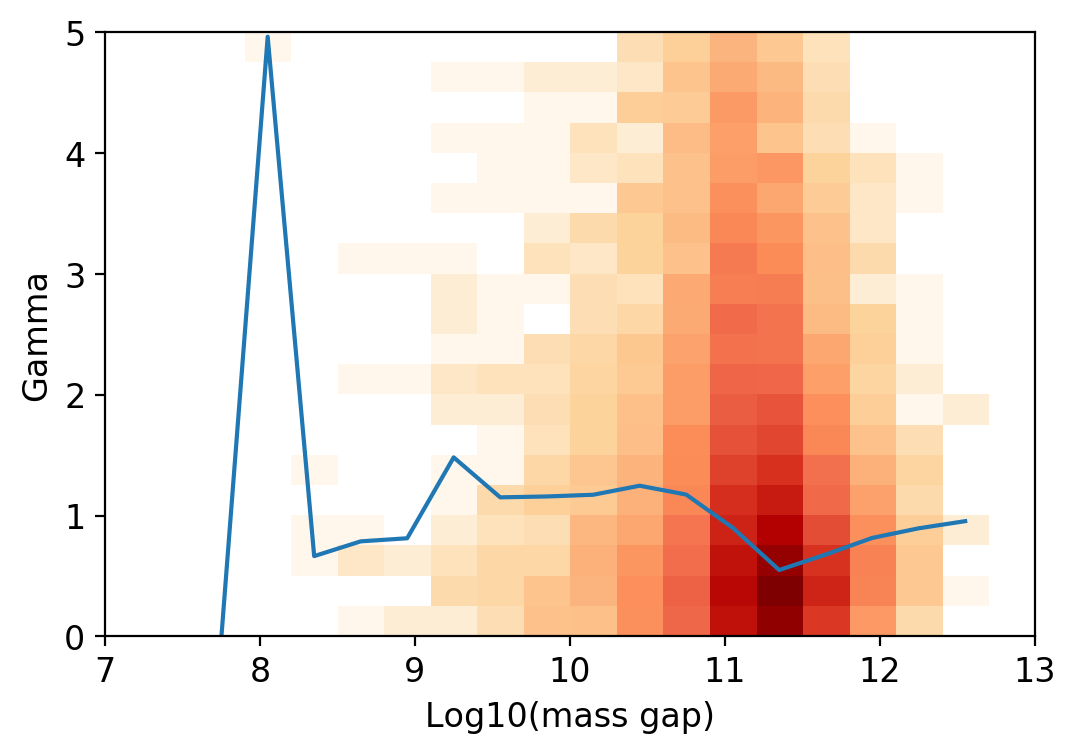

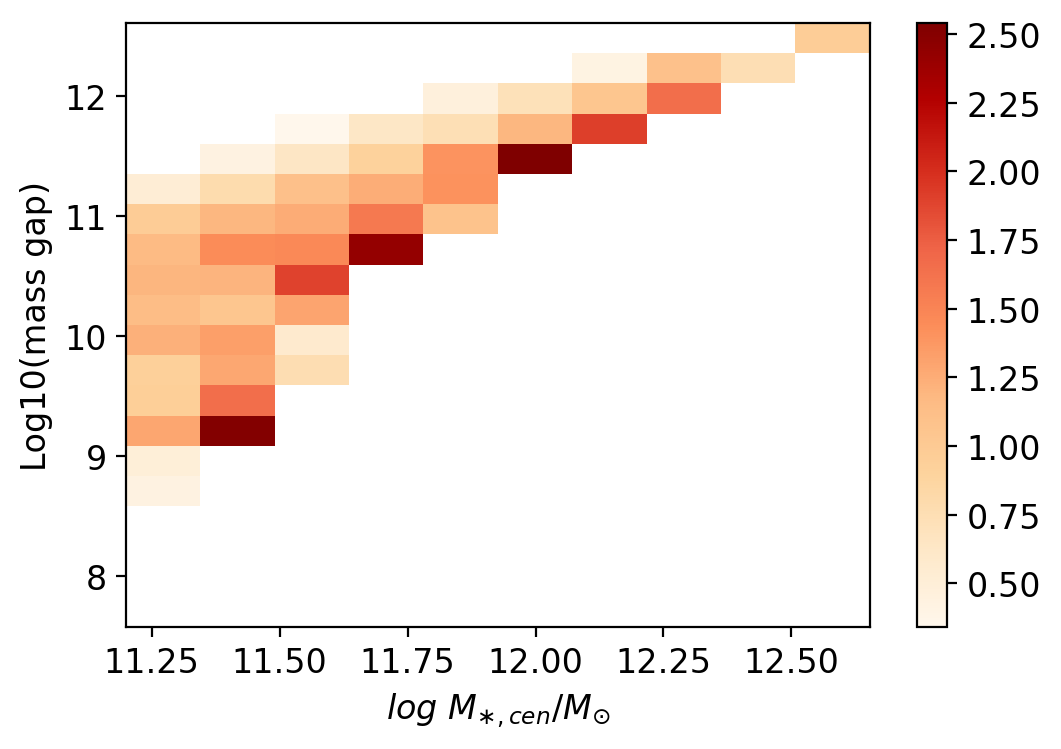

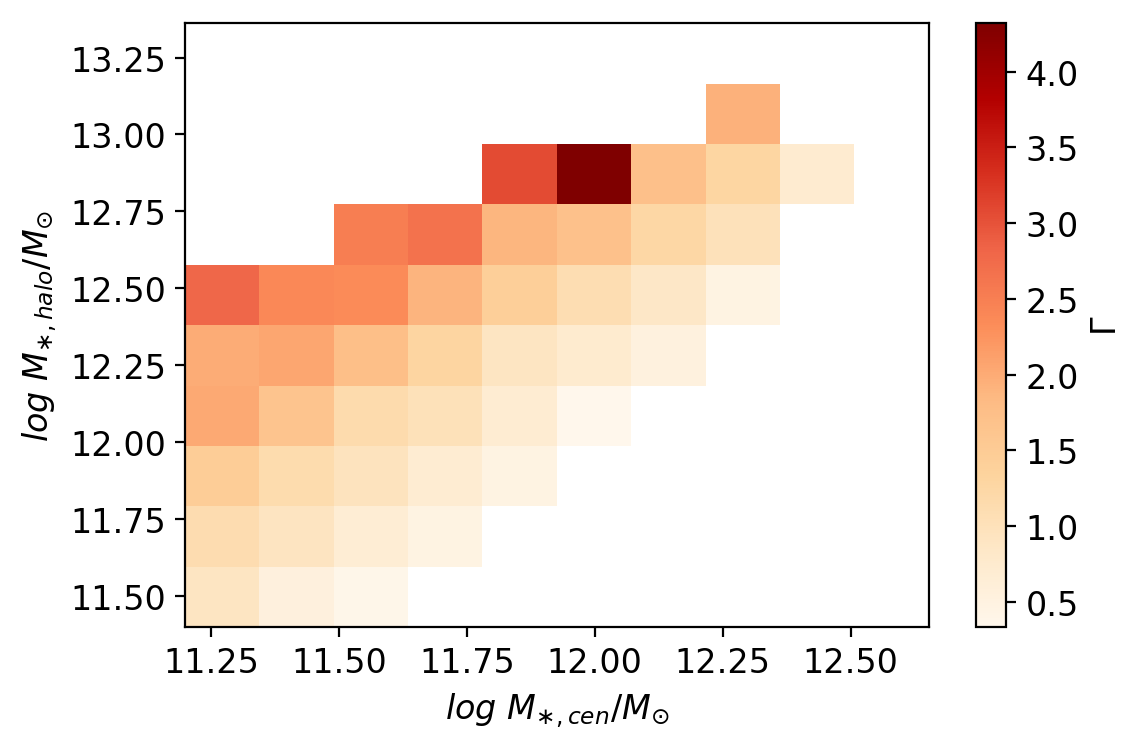

In [46]:
#### 1
p.gamma.one(mag_gap, gammas)


p.gamma.two(masses, mag_gap, gammas)
p.gamma.gamma_in_mstarcen_mstarhalo_bins(j_cen_mass, j_halo_mass, j_gammas)

## Weird systems

These systems are weird

2389
SM + ICL masses
11.244326610230637
11.511656132123303
12.642821071966178
SM masses
10.48315920971698
11.310268366632448
Halo masses
14.592731766393962
14.258397804095509


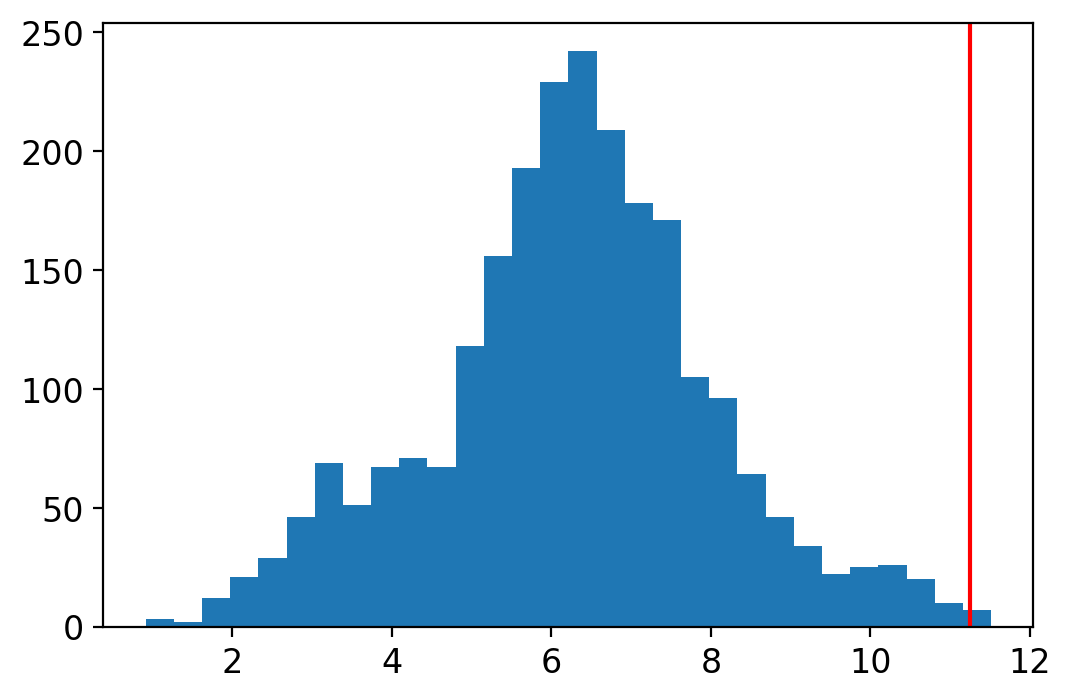

In [262]:
ids = [8324126763, 8359247626] # in the stellar cut, these have low central stellar masses but significantly higher halo stellar masses
x = 8324126763

cent = centrals[centrals["id"] == x][0]
sats = satellites[satellites["upid"] == x]
print(len(sats))

sat_masses = sats["sm"] + sats["icl"]
cent_mass = cent["sm"] + cent["icl"]
_, ax = plt.subplots()
ax.hist(np.log10(sat_masses), bins=30)
ax.axvline(np.log10(cent_mass), color="r")

print("SM + ICL masses")
print(np.log10(cent_mass))
print(np.log10(np.max(sat_masses)))
print(np.log10(cent_mass + np.sum(sat_masses)))

print("SM masses")
print(np.log10(cent["sm"]))
print(np.log10(np.max(sats["sm"])))

print("Halo masses")
print(np.log10(cent["m"]))
print(np.log10(np.max(sats["mp"])))

# Anderson Darling bug

In [101]:
x = np.array([0.2943898,  0.31026009, 0.32024697, 0.3251063,  0.33047437, 0.33227807, 0.33527855, 0.3369598,  0.33981001, 0.34310187, 0.34498784, 0.34611471, 0.34720527, 0.34820112, 0.34914078, 0.34999127, 0.35086913, 0.35138377, 0.35197235, 0.35284016, 0.35395161, 0.35508278, 0.35618394, 0.35684885, 0.35763913, 0.35885608, 0.35933545, 0.35972012, 0.36062881, 0.36123726, 0.36146292, 0.36237495, 0.36296535, 0.36384092, 0.36452154, 0.36498766, 0.36586908, 0.36617373, 0.36709255, 0.36778409, 0.36824636, 0.36911063, 0.3694072,  0.37023957, 0.37062408, 0.37150969, 0.37212156, 0.37243212, 0.37319833, 0.37358961, 0.37378095, 0.37440372, 0.37519317, 0.37548004, 0.37590316, 0.37637119, 0.37654993, 0.37673388, 0.37704812, 0.37743053, 0.3780432,  0.37840949, 0.37868305, 0.37899342, 0.37927624, 0.37960555, 0.37990951, 0.38011641, 0.38041009, 0.38081035, 0.38094915, 0.38150363, 0.38185828, 0.38219594, 0.38259749, 0.38293101, 0.38326633, 0.38376028, 0.38403854, 0.38447037, 0.38470318, 0.38514693, 0.38537623, 0.38573031, 0.38624255, 0.38651465, 0.38697047, 0.38736645, 0.38765291, 0.38794911, 0.38836684, 0.38871224, 0.38899491, 0.38923344, 0.38947898, 0.38987837, 0.39031504, 0.39052643, 0.39074392, 0.39118328, 0.39123456, 0.39149136, 0.39183555, 0.39198989, 0.39252758, 0.39271138, 0.39302807, 0.39321335, 0.39342341, 0.3936372,  0.39402984, 0.39428851, 0.39497906, 0.39511482, 0.39524189, 0.3957343,  0.39595598, 0.396337,   0.,39667312, 0.39718638, 0.39742738, 0.39762104, 0.39785846, 0.39795496, 0.39834673, 0.39848696, 0.39870941, 0.39923001, 0.39953917, 0.39989055, 0.40022309, 0.40033653, 0.4007097,  0.40112037, 0.40127716, 0.4013889,  0.40176083, 0.40216356, 0.40236316, 0.40254175, 0.40306778, 0.40330739, 0.40351653, 0.40394789, 0.40432037, 0.40471499, 0.40496062, 0.40555082, 0.40589772, 0.40609774, 0.40633961, 0.40650975, 0.40694968, 0.40712646, 0.40755198, 0.40769833, 0.4077926,  0.40801387, 0.40824173, 0.40842816, 0.40879979, 0.40891686, 0.40914259, 0.40930817, 0.40948494, 0.40978564, 0.41002935, 0.41017003, 0.4102041,  0.41045348, 0.41074888, 0.41098637, 0.41126975, 0.41142482, 0.41179117, 0.41200437, 0.4124403,  0.41260783, 0.41284896, 0.41293932, 0.4132329,  0.41336181, 0.41363951, 0.41393625, 0.41402066, 0.41427204, 0.41447654, 0.41464836, 0.41479049, 0.41507301, 0.41529315, 0.415433,   0.,41563749, 0.41583371, 0.41623605, 0.41624445, 0.41641911, 0.41662069, 0.41665166, 0.4168778,  0.41717114, 0.41735773, 0.41758023, 0.41770169, 0.41820387, 0.41840758, 0.4186037,  0.41888114, 0.41903146, 0.41914876, 0.41948101, 0.41983016, 0.41994919, 0.42022701, 0.42041927, 0.42069579, 0.42073371, 0.42103855, 0.42118826, 0.42155809, 0.42189394, 0.4220118,  0.42235286, 0.42248677, 0.42270244, 0.42288052, 0.42304944, 0.42337953, 0.42359412, 0.42372125, 0.4239475,  0.42412007, 0.4243185,  0.4243875,  0.42468546, 0.42473567, 0.42493541, 0.42522452, 0.42538243, 0.42552489, 0.42580888, 0.42602962, 0.42621371, 0.42639943, 0.42656184, 0.42690007, 0.42700462, 0.42719898, 0.42742452, 0.42774784, 0.42789931, 0.42809486, 0.42822637, 0.42853133, 0.42858679, 0.4287486,  0.42890584, 0.42914467, 0.42932724, 0.42957665, 0.42983405, 0.4300371,  0.43018723, 0.43057751, 0.43075928, 0.43089394, 0.43109174, 0.43126448, 0.43142022, 0.43173872, 0.43206228, 0.4322891,  0.43251184, 0.43260228, 0.43284121, 0.43295628, 0.43304344, 0.4331966,  0.43335416, 0.4336206,  0.43373637, 0.4339924,  0.43412431, 0.43439808, 0.43461469, 0.43475249, 0.43495523, 0.43526994, 0.43532047, 0.43564821, 0.43575572, 0.4358578,  0.43611662, 0.4363293,  0.43661673, 0.43684716, 0.43698112, 0.43720258, 0.43757743, 0.43771622, 0.43794603, 0.4380955,  0.43820865, 0.43845188, 0.43866971, 0.43893258, 0.43927442, 0.43950195, 0.43972126, 0.43980035, 0.44002589, 0.44022316, 0.44042739, 0.440631,   0.,44084808, 0.44107998, 0.44123009, 0.4414833,  0.44168474, 0.44193235, 0.44212027, 0.44231808, 0.44254654, 0.44264502, 0.44284874, 0.44297242, 0.44318325, 0.44329066, 0.44346483, 0.44362062, 0.44368702, 0.44395323, 0.44419404, 0.44436974, 0.44445006, 0.44455838, 0.44464212, 0.44473084, 0.44489809, 0.44513576, 0.44522016, 0.44530294, 0.44564696, 0.4458375,  0.44602681, 0.44617002, 0.44645368, 0.44658679, 0.44674923, 0.44691494, 0.44715414, 0.44731952, 0.44746618, 0.44755955, 0.44766114, 0.44793979, 0.44815277, 0.44835195, 0.44855088, 0.44866409, 0.44877124, 0.44893118, 0.4490359,  0.44925037, 0.44936745, 0.44954534, 0.44983697, 0.44997079, 0.45008273, 0.45023178, 0.45048979, 0.45055412, 0.45084001, 0.45101564, 0.45111962, 0.45128532, 0.45134849, 0.45163143, 0.45186549, 0.45203069, 0.45210508, 0.45231889, 0.45250971, 0.45265606, 0.45279807, 0.45288971, 0.45296176, 0.45327458, 0.45354995, 0.45355746, 0.45363922, 0.45384009, 0.45395727, 0.4539844,  0.45427354, 0.45431732, 0.45453244, 0.4547189,  0.45487134, 0.45508029, 0.45524311, 0.45540378, 0.45575381, 0.4558047,  0.4560148,  0.45614868, 0.45621355, 0.45639086, 0.45657209, 0.45675764, 0.45688802, 0.45728762, 0.45737249, 0.45747178, 0.45761323, 0.45780314, 0.45804135, 0.45828221, 0.45846634, 0.45869533, 0.45895868, 0.45912291, 0.45945388, 0.45959229, 0.45972455, 0.46001917, 0.46017549, 0.46060756, 0.46075862, 0.46110672, 0.46118048, 0.46126638, 0.46149206, 0.4615347,  0.46165223, 0.46181037, 0.46212135, 0.46226595, 0.46250749, 0.4625906,  0.46282273, 0.46291795, 0.46313214, 0.46336673, 0.46353288, 0.46376038, 0.46404576, 0.46419816, 0.46439642, 0.46462703, 0.46481122, 0.46494733, 0.46521991, 0.46529762, 0.46535623, 0.46555012, 0.46575429, 0.46616929, 0.46630262, 0.46639727, 0.46671064, 0.46692048, 0.46704355, 0.46723318, 0.46753037, 0.46764196, 0.46776609, 0.46801206, 0.46821337, 0.46840176, 0.46858636, 0.46871835, 0.46892496, 0.46896949, 0.46917076, 0.46945237, 0.46956236, 0.46993142, 0.47016029, 0.47027741, 0.47040607, 0.47074573, 0.47108185, 0.47119287, 0.47137437, 0.47179259, 0.47194992, 0.47204759, 0.47220295, 0.47248555, 0.47279984, 0.47290378, 0.47307993, 0.47315119, 0.47334712, 0.47377138, 0.47408005, 0.47419657, 0.47438901, 0.47451952, 0.47463146, 0.47491321, 0.47517854, 0.47533386, 0.47562375, 0.47573821, 0.47603538, 0.47612069, 0.47638389, 0.47659601, 0.47677637, 0.47686861, 0.47714409, 0.47750873, 0.47762155, 0.47784542, 0.47800639, 0.47830034, 0.47837692, 0.47859531, 0.47871325, 0.47882484, 0.4789801,  0.47925839, 0.47938376, 0.47962563, 0.47984374, 0.48004014, 0.48018911, 0.4803613,  0.48051388, 0.48054421, 0.48071498, 0.48077217, 0.48102926, 0.48109584, 0.48123616, 0.48141354, 0.48153219, 0.48164018, 0.48191283, 0.48204725, 0.48210113, 0.4822739,  0.48232996, 0.48248815, 0.48262896, 0.48285644, 0.48290418, 0.48299379, 0.48304557, 0.48317886, 0.48334161, 0.48351057, 0.4836641,  0.48375224, 0.48388138, 0.48397908, 0.48416329, 0.48421907, 0.48435429, 0.48450826, 0.48466613, 0.48483038, 0.48495926, 0.48510516, 0.48517119, 0.48531571, 0.48546205, 0.48563337, 0.48580049, 0.48604261, 0.48616815, 0.48632267, 0.48647356, 0.48655435, 0.4866394,  0.4868604,  0.48693783, 0.48700148, 0.48713946, 0.48729975, 0.48741079, 0.48754087, 0.48766774, 0.48780174, 0.48796256, 0.48802726, 0.4882119,  0.4883598,  0.48838253, 0.48853509, 0.48855556, 0.4886347,  0.48885586, 0.48911469, 0.48921097, 0.48925323, 0.48943507, 0.48950322, 0.48968929, 0.48976055, 0.48992728, 0.49026881, 0.49040208, 0.49044862, 0.49059109, 0.49078057, 0.49089511, 0.49096012, 0.49109507, 0.49116446, 0.49123645, 0.49136458, 0.49151215, 0.49164924, 0.49176163, 0.49188742, 0.49196535, 0.49208917, 0.49217045, 0.49227907, 0.49249906, 0.49281435, 0.49299468, 0.49307363, 0.49327906, 0.49340065, 0.49353478, 0.49370376, 0.49381911, 0.49396997, 0.49403599, 0.49414042, 0.49429705, 0.49439487, 0.49450211, 0.49457802, 0.49471977, 0.49483625, 0.49494973, 0.49514639, 0.49525211, 0.49532448, 0.49550761, 0.49568339, 0.49580098, 0.49591103, 0.49599851, 0.49617042, 0.49637106, 0.49647552, 0.49658089, 0.49668935, 0.49685767, 0.49698809, 0.49709759, 0.49729429, 0.49746959, 0.49754248, 0.49783682, 0.49794081, 0.49812389, 0.49828438, 0.49850969, 0.4985861,  0.49869746, 0.49882792, 0.49893528, 0.49907618, 0.49915737, 0.4993015,  0.49938796, 0.49943725, 0.49966355, 0.49975068, 0.49988094, 0.49993561, 0.50029903, 0.50065387, 0.50099557, 0.50143973, 0.50176026, 0.50233286, 0.50283512, 0.50304452, 0.50347159, 0.50395455, 0.50433898, 0.50485229, 0.50527765, 0.50535019, 0.50567418, 0.50606461, 0.50627419, 0.50700376, 0.5072673,  0.5075878,  0.50787049, 0.50843284, 0.5087933,  0.50943434, 0.50988223, 0.51015312, 0.51051028, 0.51091455, 0.51101383, 0.51178124, 0.51202678, 0.51242795, 0.51307228, 0.51348837, 0.51398326, 0.51439118, 0.51501922, 0.51512074, 0.51543851, 0.51596214, 0.51641175, 0.51694556, 0.51728727, 0.51743939, 0.51778913, 0.51815954, 0.5185504,  0.51915139, 0.51974315, 0.51982834, 0.52042283, 0.52082888, 0.52149365, 0.52172573, 0.52206537, 0.52250618, 0.52306419, 0.52351383, 0.52395675, 0.52427175, 0.52490515, 0.52533393, 0.52556853, 0.52592515, 0.52649321, 0.52676811, 0.52689719, 0.52736462, 0.52791372, 0.52822251, 0.5285166,  0.5286935,  0.52930702, 0.52946466, 0.52979268, 0.53048508, 0.5312704,  0.53158368, 0.53202785, 0.53237464, 0.53358902, 0.53399093, 0.53426847, 0.5349216,  0.53521327, 0.53543614, 0.53611253, 0.53623375, 0.53670939, 0.53735038, 0.53826072, 0.53848036, 0.53923306, 0.53990691, 0.5402454,  0.54030595, 0.54115347, 0.54199953, 0.54203918, 0.5423885,  0.54277413, 0.54345659, 0.54385668, 0.54418704, 0.5444715,  0.54466455, 0.544911,   0.,5452222,  0.5456167,  0.54571933, 0.54595536, 0.54619108, 0.54635758, 0.54643508, 0.54658619, 0.54702994, 0.54735317, 0.54744514, 0.54756968, 0.54765644, 0.54788864, 0.5481662,  0.54862165, 0.54884341, 0.54890088, 0.5490734,  0.54928645, 0.54949109, 0.5496176,  0.54993354, 0.55011694, 0.55023087, 0.55043072, 0.55067555, 0.55078969, 0.55127698, 0.55146943, 0.55169753, 0.55186163, 0.55230157, 0.55250344, 0.55275186, 0.552945,   0.,55333872, 0.55346736, 0.55354817, 0.55363468, 0.55398946, 0.55426115, 0.55460435, 0.5548073,  0.55504768, 0.55531466, 0.55551036, 0.55558778, 0.55599144, 0.55612447, 0.55627678, 0.55640135, 0.5566031,  0.5567712,  0.55698813, 0.55728345, 0.55746769, 0.55768844, 0.55777629, 0.5580692,  0.55832923, 0.55847537, 0.55853337, 0.55868275, 0.55893731, 0.55926237, 0.55935924, 0.55967116, 0.55989214, 0.56012618, 0.56047483, 0.5606093,  0.560774,   0.,56086133, 0.56104555, 0.56120112, 0.56138687, 0.56151275, 0.56160224, 0.56181241, 0.56215048, 0.56220834, 0.56239501, 0.56263484, 0.56322971, 0.56344231, 0.56361244, 0.56378005, 0.56389914, 0.56422183, 0.56464154, 0.56481575, 0.56498346, 0.56513474, 0.56519091, 0.56543976, 0.5656349,  0.56584809, 0.56596259, 0.56621198, 0.56626531, 0.56658075, 0.56676106, 0.56703454, 0.56712096, 0.56748353, 0.56786017, 0.56801464, 0.5680957,  0.56825556, 0.56835547, 0.56848094, 0.56885615, 0.56902116, 0.56922604, 0.56963652, 0.56988511, 0.57012812, 0.57025869, 0.57054459, 0.57061053, 0.57099773, 0.57117589, 0.57143517, 0.57167922, 0.57209708, 0.57238585, 0.57268024, 0.57287895, 0.57306681, 0.5735614,  0.5737936,  0.57405716, 0.57429305, 0.5745542,  0.57466739, 0.57475737, 0.574817,   0.,57502467, 0.57527696, 0.57551636, 0.57562246, 0.57578078, 0.57612834, 0.57641787, 0.57672451, 0.57690353, 0.57705538, 0.57729595, 0.57758301, 0.57778179, 0.57794028, 0.57806616, 0.57840703, 0.57867682, 0.57881577, 0.57896888, 0.57908076, 0.57934198, 0.57957845, 0.57979615, 0.58002515, 0.58051131, 0.58061192, 0.58091073, 0.58102785, 0.58116433, 0.58132461, 0.58180472, 0.58193923, 0.5820474,  0.58238704, 0.582513,   0.,58285843, 0.58331673, 0.58346147, 0.58374588, 0.58399134, 0.58410736, 0.58417828, 0.58440058, 0.58455157, 0.58484404, 0.58503558, 0.58518181, 0.58537698, 0.58560831, 0.58583015, 0.58629585, 0.58650941, 0.58679952, 0.58699089, 0.58710146, 0.58736854, 0.58769778, 0.58809236, 0.58846827, 0.5887024,  0.58894515, 0.58913024, 0.58926503, 0.58944572, 0.58999055, 0.59025076, 0.59049116, 0.59068619, 0.59094245, 0.59128576, 0.59141021, 0.59175,    0,.5920081,  0.59229221, 0.59266192, 0.59299788, 0.59321703, 0.59352522, 0.59367469, 0.59380459, 0.59409437, 0.59468709, 0.59500949, 0.59546624, 0.59560779, 0.59576432, 0.59612623, 0.5962966,  0.59655668, 0.59679732, 0.59700671, 0.59754627, 0.59792208, 0.59823093, 0.59839961, 0.59877509, 0.59911452, 0.59941492, 0.59985394, 0.60029291, 0.60074917, 0.60102215, 0.6013605,  0.60168491, 0.60186512, 0.60207568, 0.60235239, 0.60250843, 0.60283783, 0.60310888, 0.60338726, 0.60370127, 0.60422863, 0.6045158,  0.60468372, 0.60500843, 0.60530158, 0.60555128, 0.60587758, 0.60636487, 0.6065443,  0.60686944, 0.6071303,  0.60729623, 0.60753891, 0.60769488, 0.6079594,  0.60822007, 0.60864133, 0.60894702, 0.60923885, 0.60963328, 0.60989058, 0.61019912, 0.61056027, 0.61100205, 0.61115997, 0.61154614, 0.6118442,  0.61202623, 0.61240842, 0.6128144,  0.61310313, 0.6135573,  0.61378872, 0.61421605, 0.61470084, 0.61508977, 0.61540532, 0.61583289, 0.61614986, 0.6165023,  0.61688129, 0.61715068, 0.61738086, 0.61759765, 0.61793803, 0.61830255, 0.61850924, 0.6188675,  0.61921646, 0.61946924, 0.61988928, 0.62047681, 0.62083503, 0.62106676, 0.62128375, 0.62167016, 0.62189011, 0.62220539, 0.62268428, 0.62293419, 0.62326522, 0.6236679,  0.62390444, 0.62410132, 0.62458861, 0.62489695, 0.62516114, 0.62539605, 0.6255835,  0.62595313, 0.62639436, 0.62660096, 0.62693198, 0.62720159, 0.62745149, 0.627899,   0.,62819125, 0.62872643, 0.62936389, 0.62948052, 0.63003605, 0.63076898, 0.63122565, 0.63165344, 0.63209788, 0.63276291, 0.63306641, 0.63343914, 0.63420835, 0.63508258, 0.63556629, 0.63583447, 0.63645173, 0.63685385, 0.63740834, 0.63780119, 0.63821001, 0.63864965, 0.63942303, 0.63976808, 0.64015102, 0.64073618, 0.64154798, 0.64303597, 0.64332417, 0.64424952, 0.64480873, 0.64542663, 0.64623345, 0.64722807, 0.64818229, 0.64873719, 0.64957204, 0.65036011, 0.65101082, 0.65266717, 0.6537829,  0.65495533, 0.65596752, 0.65752482, 0.65857303, 0.66083734, 0.66202061, 0.6643009,  0.66587062, 0.66695409, 0.66814818, 0.6695087,  0.67402858, 0.67764588, 0.6805228])
y = np.array([0.23513338, 0.27203285, 0.29511892, 0.3016504,  0.30584398, 0.30783473, 0.31490553, 0.31596613, 0.316854,   0.,31818932, 0.31863277, 0.320514,   0.,32217288, 0.32330191, 0.32537645, 0.32581602, 0.32726565, 0.32867811, 0.32939811, 0.33109806, 0.33180682, 0.3319276,  0.33300255, 0.33424496, 0.33525022, 0.33538098, 0.33540819, 0.33608261, 0.3362373,  0.33661026, 0.33721674, 0.33738734, 0.33776485, 0.33854729, 0.33890012, 0.33935239, 0.34146306, 0.34281058, 0.34460682, 0.34505224, 0.34532633, 0.34598898, 0.34599648, 0.34765864, 0.34766568, 0.34856836, 0.34865867, 0.34884645, 0.34904328, 0.34920137, 0.34970381, 0.34985306, 0.35039684, 0.3506964,  0.35150059, 0.3521109,  0.35215089, 0.35267208, 0.35283373, 0.35306926, 0.35310727, 0.35414747, 0.35415072, 0.35430804, 0.35473516, 0.3559652,  0.35609616, 0.35646088, 0.35686768, 0.35712564, 0.35718879, 0.35773627, 0.35807383, 0.35812506, 0.35895747, 0.35932233, 0.35951205, 0.35963562, 0.35970738, 0.36019728, 0.36088216, 0.36095228, 0.36113251, 0.36127188, 0.36142759, 0.36168686, 0.3617958,  0.36212035, 0.3625524,  0.36264836, 0.36324964, 0.36339885, 0.36371281, 0.36412578, 0.36414685, 0.36447968, 0.36478699, 0.3650732,  0.36514497, 0.3654198,  0.36549808, 0.36560187, 0.36561826, 0.36603462, 0.3663031,  0.36671834, 0.3670607,  0.36776711, 0.36780651, 0.36806667, 0.36823909, 0.36840908, 0.36842292, 0.36902655, 0.36903199, 0.36911089, 0.36917385, 0.36922996, 0.36931178, 0.3694991,  0.36955899, 0.37023923, 0.37040297, 0.37053689, 0.3706548,  0.37105956, 0.37109083, 0.37119041, 0.37132554, 0.37160243, 0.37303,    0,.37304797, 0.37312088, 0.37349133, 0.37353532, 0.3737654,  0.37412082, 0.37439557, 0.37466844, 0.37469234, 0.37488254, 0.37502148, 0.37538579, 0.37543153, 0.37545399, 0.37559521, 0.37594291, 0.37660097, 0.37671968, 0.37680376, 0.3769643,  0.3770116,  0.37724467, 0.3772904,  0.37748402, 0.37750705, 0.37768248, 0.37771204, 0.37797881, 0.37818719, 0.37827945, 0.37876038, 0.37883983, 0.37905216, 0.37910544, 0.37910774, 0.37931326, 0.37942584, 0.37944058, 0.37964432, 0.38004503, 0.38009992, 0.38053945, 0.38066171, 0.38074041, 0.38088526, 0.38093554, 0.38094953, 0.38126684, 0.38145806, 0.38149977, 0.38160018, 0.38170911, 0.38213079, 0.38227318, 0.38287562, 0.38297709, 0.38305416, 0.38343364, 0.38359541, 0.3836789,  0.38369628, 0.38370792, 0.38371235, 0.38379707, 0.38387106, 0.38401308, 0.38464714, 0.38477173, 0.38486177, 0.38487896, 0.38492177, 0.3853694,  0.38597809, 0.38637016, 0.38658115, 0.3866466,  0.38665804, 0.38692815, 0.3871091,  0.38719859, 0.38728529, 0.38733817, 0.3874216,  0.387489,   0.,38755326, 0.38789369, 0.38792544, 0.38807188, 0.38810688, 0.38864099, 0.38874243, 0.38889801, 0.38897673, 0.38908553, 0.3892712,  0.38928347, 0.38957217, 0.38983109, 0.38991032, 0.39004598, 0.3901456,  0.39034288, 0.39049429, 0.39069317, 0.39104388, 0.39112107, 0.39114941, 0.39127032, 0.39129483, 0.39130436, 0.3913696,  0.39142877, 0.39152803, 0.39160246, 0.39166693, 0.39170226, 0.39197879, 0.39225384, 0.39285878, 0.39290286, 0.39309966, 0.39314677, 0.39317618, 0.39329624, 0.39330757, 0.39344224, 0.39364422, 0.39374876, 0.39391178, 0.39406995, 0.39407753, 0.39432545, 0.39441796, 0.39471822, 0.39483094, 0.3949607,  0.39509304, 0.39512308, 0.3955794, 0.39562298, 0.39616132, 0.39632736, 0.3964126,  0.39660313, 0.39666921, 0.39708762, 0.39713471, 0.3972552,  0.39764885, 0.39781688, 0.39829814, 0.39884137, 0.39889508, 0.39922954, 0.39974101, 0.39975255, 0.4002517,  0.40042882, 0.40099021, 0.40101491, 0.40134022, 0.4015012,  0.40176727, 0.40218821, 0.40231623, 0.40235124, 0.40251086, 0.40265682, 0.40283394, 0.40288089, 0.40289528, 0.40292146, 0.40311831, 0.40312141, 0.40342729, 0.40364827, 0.40371336, 0.40398435, 0.40407446, 0.40418033, 0.40425955, 0.40458543, 0.40459797, 0.40507723, 0.40509089, 0.40543744, 0.40562935, 0.40565592, 0.4058546,  0.40603695, 0.40634981, 0.40664453, 0.40673606, 0.40706312, 0.40711245, 0.40737647, 0.40762076, 0.40766078, 0.40795508, 0.40816527, 0.40817189, 0.40860325, 0.40871345, 0.40919299, 0.40980551, 0.40996811, 0.41011931, 0.4104895,  0.41049221, 0.41058148, 0.4106084,  0.41065132, 0.41086531, 0.41098898, 0.41110974, 0.41114679, 0.41121149, 0.4114111,  0.41157188, 0.41158175, 0.41184363, 0.41206124, 0.41206524, 0.41228904, 0.41235419, 0.41236499, 0.41247892, 0.41264862, 0.41278493, 0.41307554, 0.41340845, 0.4134586,  0.41346252, 0.41347315, 0.41350217, 0.41353961, 0.41370123, 0.41388271, 0.41395978, 0.41396124, 0.41423743, 0.41473244, 0.41477264, 0.41496148, 0.4149839,  0.41498925, 0.41503729, 0.41509706, 0.41525701, 0.41534197, 0.41539033, 0.41564634, 0.41601048, 0.41623594, 0.41623915, 0.41649053, 0.41660706, 0.41663376, 0.41675005, 0.41689117, 0.41695456, 0.41704696, 0.41734208, 0.41756523, 0.41770135, 0.41775591, 0.41811227, 0.41854228, 0.41865817, 0.41882511, 0.41890823, 0.4190767,  0.41914386, 0.41918558, 0.41928172, 0.41950781, 0.41966728, 0.41968007, 0.41983408, 0.42000604, 0.42019792, 0.42043109, 0.42108696, 0.42126944, 0.4216145,  0.42186534, 0.42210032, 0.42210148, 0.42233058, 0.42235938, 0.42251287, 0.42254348, 0.4225598,  0.42276106, 0.42292981, 0.42326571, 0.42331638, 0.42347338, 0.42349959, 0.42350189, 0.42358867, 0.42396953, 0.42398421, 0.42401838, 0.42414251, 0.42426897, 0.42429248, 0.42429839, 0.42444265, 0.42446378, 0.42454995, 0.42461571, 0.42468879, 0.42471166, 0.42502237, 0.42531089, 0.42566037, 0.42575869, 0.42586569, 0.42587261, 0.42593434, 0.42601758, 0.42606788, 0.42613319, 0.4262684,  0.42635894, 0.42642909, 0.42661015, 0.42670174, 0.4267219,  0.42676922, 0.42684516, 0.42692813, 0.4270459,  0.42751364, 0.42765939, 0.42791803, 0.42799114, 0.42799408, 0.42799883, 0.42861752, 0.42863175, 0.42874015, 0.42876624, 0.42888258, 0.42928789, 0.42975946, 0.42988957, 0.43000788, 0.43028001, 0.43059969, 0.43067255, 0.4308671,  0.43087579, 0.43094173, 0.43094587, 0.43106954, 0.43124051, 0.4313451,  0.43148922, 0.43157474, 0.43165796, 0.43172316, 0.43200802, 0.43224316, 0.43244939, 0.43250295, 0.43296345, 0.43320247, 0.43343055, 0.43359132, 0.43362199, 0.43368117, 0.43382202, 0.43445855, 0.43462497, 0.43485479, 0.43500224, 0.43532878, 0.4354088,  0.43554053, 0.43615226, 0.43619669, 0.43623986, 0.43628639, 0.43653521, 0.43669246, 0.43681503, 0.43704008, 0.43707316, 0.43722748, 0.43727633, 0.43731486, 0.4378086,  0.43785687, 0.43801765, 0.43810948, 0.4383237,  0.43850441, 0.43861568, 0.438619,   0.,43862168, 0.43878532, 0.43893671, 0.43935303, 0.43958538, 0.43965145, 0.43982426, 0.43987511, 0.4399994,  0.4400009,  0.44025596, 0.44035937, 0.44130936, 0.44159816, 0.44167176, 0.44179617, 0.44204817, 0.44215053, 0.44243249, 0.44264284, 0.44282871, 0.44297546, 0.44327706, 0.4433379,  0.44354482, 0.44356928, 0.44369717, 0.44373125, 0.44388934, 0.44414915, 0.44419318, 0.44427277, 0.44438322, 0.44450941, 0.44454719, 0.44480866, 0.44492976, 0.44500178, 0.44500957, 0.44505569, 0.44512852, 0.44520807, 0.4454533,  0.44545656, 0.44547066, 0.44559497, 0.44562443, 0.44567359, 0.44577452, 0.44607029, 0.44609168, 0.4462236,  0.44623342, 0.44651519, 0.44662728, 0.44665692, 0.44674023, 0.44740249, 0.44745179, 0.44747998, 0.44769512, 0.44773008, 0.44777926, 0.44785265, 0.44787525, 0.44802185, 0.44812539, 0.4481349,  0.44826165, 0.4484382,  0.4488968,  0.4489851,  0.44917639, 0.44937205, 0.44971978, 0.44978203, 0.44980793, 0.44997251, 0.44999623, 0.45001762, 0.45015406, 0.45028728, 0.45033047, 0.45034259, 0.45047154, 0.4505407,  0.45091182, 0.45094193, 0.45109524, 0.45128493, 0.4513648,  0.45153748, 0.4516626,  0.45167209, 0.45167758, 0.45173794, 0.45175032, 0.4518609, 0.45190251, 0.45219083, 0.45223626, 0.45224337, 0.45234719, 0.4526518,  0.45274413, 0.45281112, 0.4528313,  0.45364801, 0.45382182, 0.45406119, 0.45411879, 0.45411925, 0.45424643, 0.45445725, 0.45457864, 0.4548348,  0.45490443, 0.45496138, 0.45545756, 0.4554822,  0.45553332, 0.45568054, 0.45627081, 0.45627404, 0.45662179, 0.45739757, 0.45743821, 0.45746321, 0.4580476,  0.45806128, 0.45812199, 0.4581625,  0.45832678, 0.45902782, 0.45907752, 0.45925313, 0.45928981, 0.45940476, 0.45970533, 0.4598926,  0.46007104, 0.46036765, 0.46043186, 0.46050153, 0.46068598, 0.46080047, 0.46095549, 0.46098987, 0.4616818,  0.46215798, 0.46234859, 0.46238647, 0.46277327, 0.46284053, 0.46311392, 0.46347292, 0.4635438,  0.4639016,  0.46426121, 0.46435908, 0.46447725, 0.46478005, 0.4649969,  0.46510863, 0.46530935, 0.46564488, 0.4658971,  0.46615161, 0.46616457, 0.46618141, 0.4665458,  0.4666255,  0.46684203, 0.46685382, 0.46686358, 0.46689537, 0.46699024, 0.46744979, 0.46799198, 0.46817848, 0.4682172,  0.46830557, 0.468479,   0.,46848752, 0.46857377, 0.46862212, 0.46863065, 0.46866797, 0.46897781, 0.4690587,  0.46921455, 0.46934611, 0.46946231, 0.46951696, 0.46958018, 0.4699215,  0.47004736, 0.47013183, 0.47021596, 0.47043553, 0.47052952, 0.47056219, 0.47080418, 0.47109803, 0.47152922, 0.47172405, 0.47175594, 0.47230021, 0.47244108, 0.47287323, 0.47312449, 0.47341397, 0.47437347, 0.47438152, 0.47456009, 0.47459674, 0.47494906, 0.47515282, 0.47533485, 0.47541815, 0.47554218, 0.47567691, 0.4759125,  0.4763199,  0.47651438, 0.4765801,  0.47667305, 0.47667778, 0.47731253, 0.47740371, 0.47745747, 0.47785308, 0.47799394, 0.47820965, 0.47839354, 0.47847364, 0.47883037, 0.47917101, 0.47925081, 0.47949535, 0.47955403, 0.47956954, 0.47970876, 0.47976142, 0.47995608, 0.48027536, 0.48056009, 0.48067463, 0.4808182,  0.4809161,  0.48095102, 0.48123768, 0.48142904, 0.4819251,  0.48229392, 0.48231416, 0.48254224, 0.4826392,  0.48273589, 0.48275272, 0.48284907, 0.48289008, 0.48294257, 0.48297716, 0.48307919, 0.4831439,  0.48341952, 0.4837695,  0.48385471, 0.48386753, 0.48391975, 0.48431869, 0.48509453, 0.48566573, 0.48588297, 0.48590102, 0.48597467, 0.48603652, 0.48612059, 0.48628915, 0.48646458, 0.48661041, 0.48662072, 0.48675309, 0.4870417,  0.48709283, 0.48731811, 0.48754375, 0.48756836, 0.48791445, 0.48830892, 0.48838625, 0.48847761, 0.48874576, 0.4888319,  0.48894753, 0.48900845, 0.48935731, 0.489371,   0.,48938878, 0.48970392, 0.49012678, 0.49017887, 0.49020115, 0.49027062, 0.49030048, 0.49056378, 0.49117266, 0.49139902, 0.49149537, 0.49177671, 0.49247405, 0.49253316, 0.49261833, 0.49265103, 0.49275136, 0.49300068, 0.49312303, 0.49316348, 0.49321923, 0.49323004, 0.49323269, 0.49328402, 0.49375563, 0.49387984, 0.49401353, 0.49418853, 0.49453154, 0.49458683, 0.49479289, 0.49488305, 0.49490898, 0.49494798, 0.49502022, 0.49508845, 0.49516516, 0.49549033, 0.49555565, 0.49562611, 0.49567598, 0.49587954, 0.49601474, 0.49607254, 0.49632514, 0.49640625, 0.49653414, 0.49687306, 0.49691108, 0.49701372, 0.49717392, 0.49789689, 0.49797448, 0.49800229, 0.49800544, 0.49810247, 0.49815529, 0.49835464, 0.49850358, 0.49861311, 0.49892893, 0.49910728, 0.49923485, 0.49924834, 0.49932597, 0.4993272,  0.49947011, 0.49952816, 0.49953869, 0.49971246, 0.49980942, 0.49983083, 0.49988114, 0.49988945, 0.49991835, 0.5002322,  0.50089095, 0.50120316, 0.5015076,  0.50165198, 0.50223336, 0.50282205, 0.50294855, 0.50337199, 0.50374309, 0.50379809, 0.50443486, 0.50463718, 0.50482713, 0.50501961, 0.50538938, 0.50925332, 0.50948456, 0.50990218, 0.510275,   0.,51118389, 0.51171466, 0.51195392, 0.5126758,  0.51276556, 0.51304633, 0.51338922, 0.51346218, 0.51359534, 0.51568247, 0.51769762, 0.5183324,  0.51883664, 0.51958724, 0.52020986, 0.52074734, 0.52147011, 0.52149342, 0.52199805, 0.52217032, 0.52219373, 0.52240918, 0.52252544, 0.52316845, 0.52341549, 0.52402982, 0.52426585, 0.52431156, 0.52499866, 0.52539533, 0.52565812, 0.5278383,  0.5280411,  0.52810604, 0.52815224, 0.52824722, 0.52829698, 0.52904926, 0.53174554, 0.53196297, 0.5325498,  0.53298905, 0.53386174, 0.53418702, 0.53651791, 0.53754082, 0.5388134,  0.53890831, 0.53964703, 0.5398184,  0.54007794, 0.54035434, 0.54165022, 0.54197413, 0.54212658, 0.54223363, 0.54334941, 0.54510577, 0.54562653, 0.54565429, 0.5457109,  0.54588513, 0.54599693, 0.546013, 0.5463056,  0.54633244, 0.54636322, 0.5469175,  0.54729095, 0.5476874,  0.5477626,  0.54868206, 0.54890232, 0.54904747, 0.5493006,  0.54954729, 0.55004857, 0.55025553, 0.55083995, 0.55113427, 0.55143756, 0.55150557, 0.5521253,  0.55218054, 0.553118,   0.,55336876, 0.55566491, 0.55622796, 0.55647525, 0.55663612, 0.55706423, 0.55742495, 0.5576207,  0.55776637, 0.55778766, 0.55804061, 0.5584155,  0.5588832,  0.55929587, 0.55931344, 0.55972134, 0.55999604, 0.56005314, 0.56029507, 0.56066851, 0.5612634,  0.56304328, 0.56312721, 0.56389875, 0.5643193,  0.56434069, 0.56503075, 0.56525804, 0.56555213, 0.56561769, 0.56717605, 0.5672425,  0.56740041, 0.56773477, 0.56781332, 0.56782518, 0.56791773, 0.56792117, 0.56793242, 0.56793777, 0.56912394, 0.56921986, 0.56945638, 0.57082537, 0.57113337, 0.57145991, 0.57299802, 0.57327097, 0.57353516, 0.57403313, 0.5747748,  0.57531859, 0.57571776, 0.57601671, 0.57632551, 0.57633492, 0.57669173, 0.57705956, 0.57839345, 0.5785731,  0.57870896, 0.57880918, 0.57882184, 0.57888757, 0.57935551, 0.58024893, 0.58103198, 0.58136258, 0.58177415, 0.58215394, 0.58271293, 0.58285126, 0.5829326,  0.58298986, 0.58335507, 0.58427421, 0.5842933,  0.58430116, 0.58455024, 0.58602062, 0.58631083, 0.58772061, 0.58832906, 0.58891052, 0.58907849, 0.59031185, 0.59033335, 0.59070285, 0.59091278, 0.59099398, 0.59341991, 0.59353343, 0.59408764, 0.59636265, 0.59646959, 0.59721033, 0.59721276, 0.59723461, 0.59828177, 0.59859653, 0.59890269, 0.59956531, 0.60142523, 0.60152917, 0.60161142, 0.60244317, 0.60255959, 0.60355567, 0.60475544, 0.60485665, 0.60504341, 0.60551383, 0.6067636,  0.60748028, 0.60906255, 0.60917085, 0.60929793, 0.61025525, 0.61038779, 0.61152786, 0.61258664, 0.6126216,  0.6132847,  0.61517726, 0.61677402, 0.61719301, 0.61746021, 0.61775194, 0.62037653, 0.62266377, 0.62268461, 0.62568038, 0.62620144, 0.62646979, 0.62700518, 0.62714191, 0.627642,   0.,63079474, 0.63249461, 0.634138,   0.,63577925, 0.63602571, 0.63721693, 0.63807841, 0.63832385, 0.64089551, 0.64362687, 0.6461049,  0.65030106, 0.65691925, 0.65932881, 0.65979791, 0.66949618, 0.67328588, 0.8202237])

/home/christopher/.virtualenvs/hsc_um2/lib/python3.6/site-packages/scipy/stats/morestats.py:1676: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


9
62819125.0
63577925.0


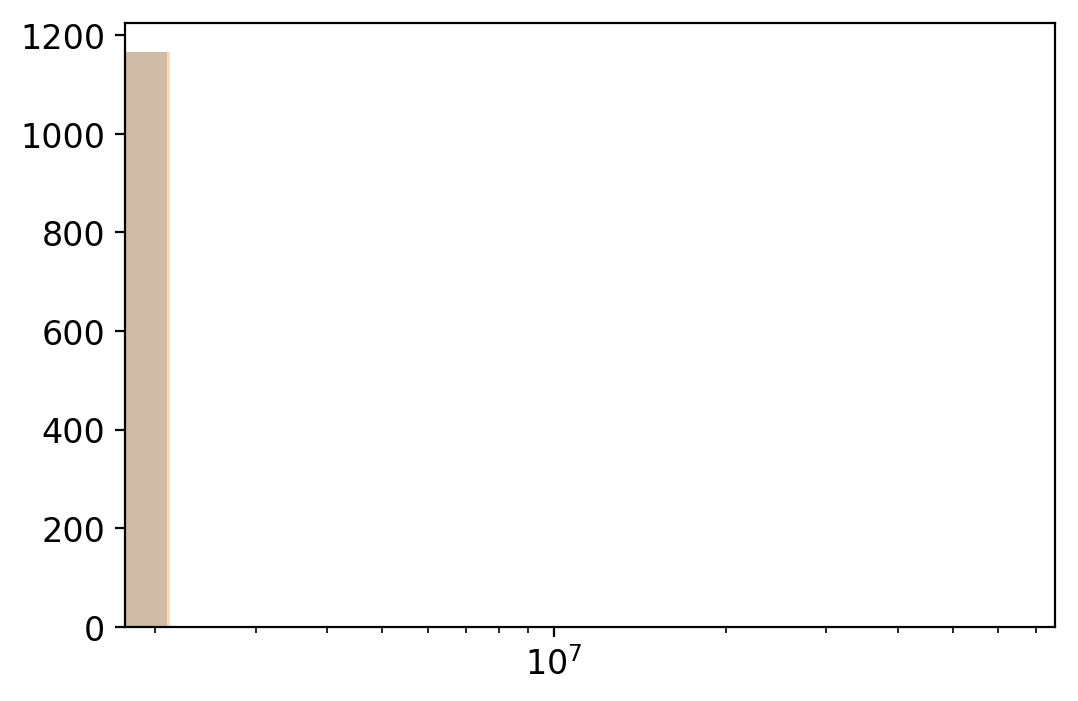

In [106]:
scipy.stats.anderson_ksamp((x, y)).significance_level
print(np.count_nonzero(x > 1))
plt.hist(x, bins=30, alpha=0.3)
plt.hist(y, bins=30, alpha=0.3)
plt.xscale("log")
print(np.max(x))
print(np.max(y))